In [1]:
# 텐서플로_변수.py

a = 10
b = [1,2,3,4]
c = (a,b)
a = a + 1
# print(a,b,c)

import tensorflow as tf

# Variable vs. placeholder : tensorflow 변수 전용 변수

# [1] Variable : 초기값이 설정, tensorflow 내부에서 연산할 때 사용되는 변수
#                weight과 bias
var1 = tf.Variable(10)
# print(var1)
# <tf.Variable 'Variable:0' shape=() dtype=int32_ref>
var2 = tf.Variable(20)
# print(var2)
# <tf.Variable 'Variable_1:0' shape=() dtype=int32_ref>
var3 = var1*var2
var4 = var3 / var1
print(var3)
# Tensor("mul:0", shape=(), dtype=int32)

# 지연실행(lazy evaluation)
sess = tf.Session()
sess.run(tf.global_variables_initializer())
var1_result = sess.run(var1)
print('var1=',var1_result)

var2_result = sess.run(var2)
print('var2=',var2_result)

print('var3=',sess.run(var3))
print('var4=',sess.run(var4))



Tensor("mul:0", shape=(), dtype=int32)
var1= 10
var2= 20
var3= 200
var4= 20.0


In [2]:
# [2] placeholder 변수 : 초기값이 정해지지 않고 
# sess.run()입력시 입력
# feed_dict={X:, Y: }
# 입력변수(빅데이터들) :  X(feature), Y (답)
holder1 = tf.placeholder(tf.float32,shape=[1])
result1  = holder1*2
print(result1)
result2 = sess.run(result1,feed_dict={holder1:[10]})
print(result2)

Tensor("mul_1:0", shape=(1,), dtype=float32)
[20.]


In [3]:
tf.__version__

'1.15.0'

In [4]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = tf.add(a, b)
sess = tf.Session()

result = sess.run(adder_node,feed_dict={a:3.2, b:4.5 })
print('result:',result)
result = sess.run(adder_node,feed_dict={a:[1,3,5,7],
                                        b:[2,4,6,8]})
print('result:',result)

result: 7.7
result: [ 3.  7. 11. 15.]


### 텐서플로로 예측모델 유형
1. LinearRegression : 입력과 출력값이 비례 관계
           예측방정식은  H(x) = w*x + b
2. clasification(분류) 모델

 2.1 binary classification : 0과 1 처럼 답이 두개만 존재
   
   (= logistic regression)
 
            예측방정식으로 sigmoid 함수 사용
      
 2.2 multi-nomial classification : 답이 세가지 이상   
            예측방정식으로 softmax함수 사용

### LinearRegression : 선형 회귀
목표: cost가 가장 작은 weight을 구하는 것

<용어>
 Hypothesis(가설)  : 예측(가설) 방정식 (H(x))
 
 Cost(비용) : loss(손실), 비용함수
 
 Gradient Descent Algorithm(경사하강법): 비용함수를 미분

In [5]:
# 예측(가설) 방정식 : hx = w * x
# x:입력 값,  y : 답
# 비용(cost) 함수
import matplotlib.pyplot as plt

def cost(x,y,w): 
    c  = 0
    for i in range(len(x)):
        hx = w * x[i]
        loss = (hx - y[i])**2 # 비용함수
        c += loss
    return c/len(x)

x = [1,2,3]
y = [1,2,4]

cost(x,y,-1) # 18.6
cost(x,y,0)  # 4.6
cost(x,y,1)  # 0.0
cost(x,y,2)  # 4.6
cost(x,y,3)  # 18.6

# 비용함수를 시각화
for i in range(-30,50):
    w = i/ 10
    c = cost(x,y,w)
#     print(w,c)
    plt.plot(w,c,'ro')

plt.xlabel('weight')  
plt.ylabel('cost')
plt.title('cost function')
plt.show()    

<Figure size 640x480 with 1 Axes>

0 378.0 5.8 42.0
1 107.51999999999998 3.56 22.399999999999995
2 30.583466666666666 2.365333333333333 11.946666666666667
3 8.69929718518518 1.7281777777777778 6.371555555555553
4 2.47446675489712 1.3883614814814815 3.3981629629629633
5 0.7038483213929583 1.2071261234567903 1.8123535802469135
6 0.2002057447517751 1.1104672658436214 0.9665885761316879
7 0.05694741184050483 1.0589158751165981 0.5155139072702332
8 0.016198374923521403 1.0314218000621858 0.2749407505441246
9 0.004607537756023892 1.0167582933664991 0.14663506695686687
10 0.0013105885172690224 1.008937756462133 0.07820536904366245
11 0.0003727896226898598 1.004766803446471 0.04170953015662023
12 0.0001060379371206724 1.002542295171451 0.02224508275019758
13 3.0161902114324568e-05 1.0013558907581073 0.011864044133438703
14 8.579385490296031e-06 1.0007231417376572 0.0063274902045003705
15 2.4403585394623746e-06 1.000385675593417 0.0033746614424004693
16 6.941464290019953e-07 1.0002056936498225 0.0017998194359460928
17 1.97446095

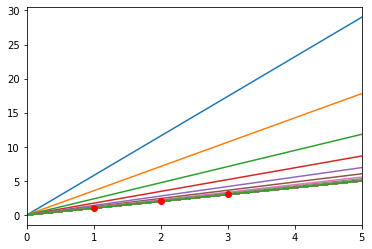

In [6]:
# Gradient Descent Algorithm(경사하강법): 비용함수를 미분
def gradient_descent(x,y,w):
    grad = 0
    for i in range(len(x)):
        hx = w * x[i]
#         loss = (hx - y[i])**2 # 비용함수
        loss_grad = (hx - y[i])*x[i] # 비용함수의 미분
#         if loss_grad == 0:
#             print('>>>>0:',loss_grad,w)
        grad += loss_grad
    return grad/len(x)

x = [1,2,3]
y = [1,2,3]
w = 10    # 임의의 값으로 일단 시작 
old = 100
for i in range(100):
    c = cost(x,y,w)
    grad = gradient_descent(x,y,w)
    w = w - grad*0.1  # Learning Rate:0.1 
    print(i,c,w,grad)
    if c >= old and abs(c - old) < 1.0e-15:
        break
    old = c   
    plt.plot((0,5),(0,5*w))
    
print('weight=',w)        

plt.plot(x,y,'ro')
plt.xlim(0,5)
plt.xlim(0,5)
plt.show()   
    

### 미분
 미분 : 순간 변화량, 기울기,   
       x축으로 1만큼 움직였을 때 y축으로 움직인 거리

y = 3      ---->  y' = 0

y = 2*x    ---->  y' =  2     (일차함수의 미분)

y = x**2   ---->  y' = 2*x    (이차함수의 미분)

y = (x + 1)**2 --> y' =  2*(x + 1)


In [7]:
# Linear_Regression.py
# Using tensorflow

import tensorflow as tf
tf.set_random_seed(777)

# X and Y data
x_train = [1,2,3]
y_train = [1,2,3]
# y_train = [4,7,10]

W = tf.Variable(tf.random_normal([1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

hypothesis = x_train * W + b

cost = tf.reduce_mean(tf.square(hypothesis - y_train ))

optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=0.01)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# start learning :학습단계
for step in range(2001):
    sess.run(train)
    if step % 20 == 0 :
        print(step,sess.run(cost),sess.run(W),sess.run(b))

# Test(검증) 단계

# Predict(예측) 단계
Weight = sess.run(W)
bias = sess.run(b)
print('Weight:',Weight)
print('bias:',bias)

x_train = [4,5,6]
hypothesis2 = x_train * W + b
pred = sess.run(hypothesis2)
print('predict:',pred)


0 3.7140586 [-0.19803932] [0.73559874]
20 0.17803223 [0.48673454] [0.9774937]
40 0.13272238 [0.5706986] [0.9578799]
60 0.12027795 [0.59657234] [0.9153697]
80 0.10923597 [0.61607456] [0.87258935]
100 0.09920985 [0.6341692] [0.8316036]
120 0.09010396 [0.65136695] [0.79252344]
140 0.08183385 [0.6677519] [0.75527805]
160 0.07432284 [0.68336636] [0.7197828]
180 0.067501195 [0.698247] [0.68595564]
200 0.061305653 [0.7124283] [0.6537182]
220 0.055678803 [0.725943] [0.6229959]
240 0.050568376 [0.7388227] [0.5937174]
260 0.04592702 [0.7510971] [0.5658149]
280 0.041711677 [0.7627945] [0.5392238]
300 0.03788321 [0.77394223] [0.51388234]
320 0.034406133 [0.7845662] [0.4897318]
340 0.031248188 [0.7946907] [0.46671617]
360 0.02838009 [0.8043395] [0.44478217]
380 0.025775254 [0.81353486] [0.42387906]
400 0.023409521 [0.82229805] [0.40395832]
420 0.021260902 [0.8306494] [0.38497376]
440 0.019309487 [0.8386083] [0.36688143]
460 0.017537182 [0.846193] [0.34963933]
480 0.015927559 [0.85342145] [0.3332076

In [8]:
# X,Y를 placeholder 를 사용하여 구현
W = tf.Variable(tf.random_normal([1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

X = tf.placeholder(tf.float32,shape=[None])
Y = tf.placeholder(tf.float32,shape=[None])

hypothesis = X * W + b

cost = tf.reduce_mean(tf.square(hypothesis - Y ))

optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=0.01)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# start learning :학습단계
for step in range(2001):
    cost_val,W_val,b_val,_ = \
        sess.run([cost,W,b,train],
#              feed_dict={X:[1,2,3],Y:[1,2,3]})
#             feed_dict={X:[1,2,3],Y:[2,4,6]})
             feed_dict={X:[1,2,3],Y:[4,6,7]})
    if step % 20 == 0 :
        print(step,cost_val,W_val,b_val)

# Predict(예측) 단계
print(sess.run(hypothesis,feed_dict={X:[4,5,6]}))
print(sess.run(hypothesis,feed_dict={X:[3.7]}))


0 1.66896 [1.4043894] [1.7238568]
20 0.14400752 [1.775677] [1.929519]
40 0.123405576 [1.7976471] [1.9795264]
60 0.11706475 [1.7869843] [2.0132823]
80 0.11141804 [1.7738137] [2.0441282]
100 0.106290735 [1.7609757] [2.0733986]
120 0.101633966 [1.7487136] [2.1012814]
140 0.09740475 [1.7370253] [2.1278527]
160 0.09356371 [1.7258859] [2.1531754]
180 0.090075016 [1.7152699] [2.1773076]
200 0.08690685 [1.7051532] [2.2003057]
220 0.0840292 [1.6955116] [2.2222228]
240 0.08141583 [1.6863233] [2.2431102]
260 0.0790422 [1.6775668] [2.2630155]
280 0.07688656 [1.6692218] [2.2819858]
300 0.07492879 [1.6612691] [2.3000638]
320 0.07315064 [1.6536902] [2.317293]
340 0.07153561 [1.6464673] [2.333712]
360 0.07006895 [1.6395838] [2.3493598]
380 0.06873679 [1.633024] [2.3642719]
400 0.067526974 [1.6267723] [2.3784835]
420 0.06642816 [1.6208142] [2.3920274]
440 0.06543031 [1.6151365] [2.4049342]
460 0.0645239 [1.6097256] [2.4172344]
480 0.06370067 [1.604569] [2.428957]
500 0.062953174 [1.5996546] [2.4401286]

In [9]:
# Car 의 속도(X)와 제동거리(Y)

# 데이터셋 가져오기
import numpy as np

# unpack=True : 행과 열을 trnspose하여 읽어옴
# skiprows=1  : 헤더를 제거하고 읽어옴  
xy = np.loadtxt('cars.csv',unpack=True,delimiter=',', \
               skiprows=1)
x = xy[0]
y = xy[1]
########################################

W = tf.Variable(tf.random_normal([1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

X = tf.placeholder(tf.float32,shape=[None])
Y = tf.placeholder(tf.float32,shape=[None])

hypothesis = X * W + b

cost = tf.reduce_mean(tf.square(hypothesis - Y ))

optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=0.001)  # 학습률 미세조정 필요
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# start learning :학습단계
for step in range(40001):
    cost_val,W_val,b_val,_ = \
        sess.run([cost,W,b,train],
             feed_dict={X:x,Y:y})
    if step % 20 == 0 :
        print(step,cost_val,W_val,b_val)

# Predict(예측) 단계
print(sess.run(hypothesis,feed_dict={X:[25]}))
print(sess.run(hypothesis,feed_dict={X:[30]}))
print(sess.run(hypothesis,feed_dict={X:[40,50,60]}))


0 1675.1663 [1.8250852] [-0.02685424]
20 258.95615 [2.9108555] [-0.03645926]
40 258.69388 [2.9150653] [-0.10874621]
60 258.43378 [2.9192574] [-0.18073532]
80 258.17584 [2.9234324] [-0.2524278]
100 257.92 [2.92759] [-0.3238249]
120 257.66632 [2.9317305] [-0.39492777]
140 257.41467 [2.935854] [-0.46573758]
160 257.16513 [2.9399602] [-0.5362556]
180 256.91766 [2.9440498] [-0.60648316]
200 256.67215 [2.9481225] [-0.67642117]
220 256.42868 [2.9521785] [-0.74607104]
240 256.18726 [2.9562175] [-0.81543416]
260 255.94777 [2.9602401] [-0.8845112]
280 255.7103 [2.964246] [-0.9533037]
300 255.47473 [2.9682355] [-1.0218124]
320 255.24112 [2.9722085] [-1.0900391]
340 255.00946 [2.976165] [-1.1579847]
360 254.77965 [2.9801056] [-1.2256502]
380 254.55176 [2.9840295] [-1.2930369]
400 254.32576 [2.9879375] [-1.3601459]
420 254.10161 [2.9918294] [-1.4269785]
440 253.8793 [2.9957051] [-1.4935356]
460 253.65878 [2.9995651] [-1.5598185]
480 253.44016 [3.0034091] [-1.6258281]
500 253.22327 [3.007237] [-1.69

4520 232.0435 [3.5289717] [-10.651066]
4540 232.00262 [3.5306342] [-10.679614]
4560 231.96204 [3.5322897] [-10.708044]
4580 231.9218 [3.5339384] [-10.736357]
4600 231.88193 [3.5355804] [-10.764553]
4620 231.84235 [3.5372157] [-10.792633]
4640 231.8031 [3.538844] [-10.820598]
4660 231.76416 [3.5404658] [-10.848447]
4680 231.72557 [3.5420809] [-10.876182]
4700 231.6873 [3.5436893] [-10.903802]
4720 231.64929 [3.545291] [-10.931308]
4740 231.61166 [3.5468862] [-10.958701]
4760 231.57431 [3.5484748] [-10.985981]
4780 231.53726 [3.5500567] [-11.013149]
4800 231.5005 [3.5516324] [-11.040205]
4820 231.46408 [3.5532014] [-11.067149]
4840 231.42796 [3.5547638] [-11.093983]
4860 231.39209 [3.5563202] [-11.120706]
4880 231.35658 [3.55787] [-11.147319]
4900 231.32129 [3.5594132] [-11.173822]
4920 231.28635 [3.5609503] [-11.200217]
4940 231.25168 [3.562481] [-11.226503]
4960 231.2173 [3.5640054] [-11.252681]
4980 231.18324 [3.5655234] [-11.2787485]
5000 231.14935 [3.5670352] [-11.30471]
5020 231.11

8960 227.86551 [3.771095] [-14.808932]
8980 227.85896 [3.7717597] [-14.820348]
9000 227.8525 [3.7724216] [-14.831716]
9020 227.84605 [3.773081] [-14.843036]
9040 227.83966 [3.7737374] [-14.85431]
9060 227.83331 [3.7743914] [-14.865539]
9080 227.82707 [3.7750423] [-14.876719]
9100 227.82085 [3.775691] [-14.887856]
9120 227.81468 [3.7763367] [-14.898945]
9140 227.80855 [3.77698] [-14.909988]
9160 227.80246 [3.7776203] [-14.920988]
9180 227.79651 [3.778258] [-14.93194]
9200 227.79051 [3.7788932] [-14.942848]
9220 227.78459 [3.779526] [-14.9537115]
9240 227.77872 [3.780156] [-14.964529]
9260 227.77286 [3.7807832] [-14.975303]
9280 227.7671 [3.781408] [-14.9860325]
9300 227.76138 [3.7820303] [-14.996717]
9320 227.75568 [3.78265] [-15.007359]
9340 227.75006 [3.783267] [-15.017957]
9360 227.74449 [3.7838817] [-15.028509]
9380 227.73895 [3.7844937] [-15.03902]
9400 227.7334 [3.785103] [-15.049486]
9420 227.72797 [3.78571] [-15.05991]
9440 227.72258 [3.7863145] [-15.070291]
9460 227.71716 [3.78

13340 227.20074 [3.8671036] [-16.45764]
13360 227.19969 [3.8673723] [-16.462255]
13380 227.19858 [3.8676407] [-16.466864]
13400 227.19756 [3.8679073] [-16.471441]
13420 227.19649 [3.8681734] [-16.476011]
13440 227.19545 [3.8684378] [-16.48055]
13460 227.19443 [3.8687017] [-16.485085]
13480 227.1934 [3.868964] [-16.489586]
13500 227.19238 [3.8692257] [-16.494083]
13520 227.1914 [3.8694856] [-16.498547]
13540 227.19038 [3.8697453] [-16.503008]
13560 227.1894 [3.870003] [-16.507433]
13580 227.18842 [3.8702607] [-16.511858]
13600 227.18745 [3.8705165] [-16.516247]
13620 227.18648 [3.870772] [-16.520634]
13640 227.18556 [3.8710253] [-16.524988]
13660 227.18462 [3.8712785] [-16.529337]
13680 227.18365 [3.87153] [-16.533657]
13700 227.18274 [3.871781] [-16.537968]
13720 227.1818 [3.872031] [-16.542255]
13740 227.1809 [3.8722796] [-16.546528]
13760 227.18 [3.8725278] [-16.550785]
13780 227.17906 [3.8727741] [-16.55502]
13800 227.17818 [3.8730204] [-16.559244]
13820 227.1773 [3.8732646] [-16.56

17780 227.09125 [3.9062967] [-17.130684]
17800 227.0911 [3.9064038] [-17.132523]
17820 227.09091 [3.9065104] [-17.134354]
17840 227.09074 [3.906617] [-17.136185]
17860 227.09059 [3.9067235] [-17.138016]
17880 227.09041 [3.90683] [-17.139847]
17900 227.09024 [3.9069352] [-17.14165]
17920 227.09007 [3.9070396] [-17.143442]
17940 227.08992 [3.907144] [-17.145235]
17960 227.08978 [3.9072485] [-17.147028]
17980 227.08958 [3.9073527] [-17.14882]
18000 227.08945 [3.907456] [-17.15059]
18020 227.0893 [3.9075582] [-17.152346]
18040 227.08914 [3.9076602] [-17.1541]
18060 227.08896 [3.9077623] [-17.155855]
18080 227.08885 [3.9078646] [-17.15761]
18100 227.08867 [3.9079661] [-17.159351]
18120 227.08852 [3.908066] [-17.161068]
18140 227.0884 [3.908166] [-17.162785]
18160 227.08824 [3.9082658] [-17.164501]
18180 227.08807 [3.9083657] [-17.166218]
18200 227.08794 [3.9084656] [-17.167934]
18220 227.08777 [3.9085636] [-17.169613]
18240 227.08766 [3.9086614] [-17.171291]
18260 227.08752 [3.908759] [-17.

22080 227.07394 [3.921659] [-17.394497]
22100 227.07393 [3.9217036] [-17.39526]
22120 227.07387 [3.921748] [-17.396023]
22140 227.07388 [3.9217923] [-17.396786]
22160 227.07385 [3.9218369] [-17.397549]
22180 227.07379 [3.9218812] [-17.398312]
22200 227.07375 [3.9219253] [-17.399067]
22220 227.07378 [3.9219675] [-17.399792]
22240 227.07372 [3.92201] [-17.400517]
22260 227.07368 [3.922052] [-17.401241]
22280 227.07367 [3.9220943] [-17.401966]
22300 227.07364 [3.9221365] [-17.40269]
22320 227.07361 [3.9221785] [-17.403416]
22340 227.0736 [3.9222207] [-17.40414]
22360 227.07355 [3.922263] [-17.404865]
22380 227.07355 [3.922305] [-17.40559]
22400 227.07352 [3.9223473] [-17.406315]
22420 227.0735 [3.9223895] [-17.40704]
22440 227.07347 [3.9224317] [-17.407764]
22460 227.07343 [3.9224732] [-17.408472]
22480 227.07343 [3.922513] [-17.409159]
22500 227.07338 [3.922553] [-17.409845]
22520 227.07336 [3.922593] [-17.410532]
22540 227.07332 [3.922633] [-17.411219]
22560 227.07329 [3.922673] [-17.41

26340 227.07101 [3.9279456] [-17.502449]
26360 227.07101 [3.9279633] [-17.502754]
26380 227.07103 [3.9279811] [-17.50306]
26400 227.07101 [3.9279988] [-17.503365]
26420 227.07101 [3.9280167] [-17.50367]
26440 227.071 [3.9280345] [-17.503975]
26460 227.07101 [3.9280522] [-17.50428]
26480 227.071 [3.9280698] [-17.504585]
26500 227.07101 [3.9280877] [-17.50489]
26520 227.07098 [3.9281054] [-17.505196]
26540 227.071 [3.9281232] [-17.5055]
26560 227.071 [3.928141] [-17.505806]
26580 227.07098 [3.9281588] [-17.506111]
26600 227.07095 [3.9281766] [-17.506416]
26620 227.07098 [3.9281943] [-17.506721]
26640 227.07095 [3.9282122] [-17.507027]
26660 227.07095 [3.9282298] [-17.507332]
26680 227.07094 [3.9282475] [-17.507637]
26700 227.07094 [3.9282653] [-17.507942]
26720 227.07092 [3.928283] [-17.508247]
26740 227.07092 [3.9283009] [-17.508553]
26760 227.07092 [3.9283187] [-17.508858]
26780 227.07092 [3.9283364] [-17.509163]
26800 227.07089 [3.9283543] [-17.509468]
26820 227.07094 [3.928372] [-17.

30720 227.07053 [3.9305992] [-17.548018]
30740 227.07051 [3.9306056] [-17.548132]
30760 227.07053 [3.9306123] [-17.548246]
30780 227.07051 [3.930619] [-17.54836]
30800 227.07054 [3.9306257] [-17.548475]
30820 227.0705 [3.9306324] [-17.54859]
30840 227.07054 [3.930639] [-17.548704]
30860 227.07051 [3.9306457] [-17.548819]
30880 227.07051 [3.9306524] [-17.548933]
30900 227.0705 [3.930659] [-17.549047]
30920 227.07051 [3.9306657] [-17.549162]
30940 227.07051 [3.9306724] [-17.549276]
30960 227.07051 [3.930679] [-17.54939]
30980 227.07051 [3.9306858] [-17.549505]
31000 227.07051 [3.9306924] [-17.54962]
31020 227.07051 [3.9306989] [-17.549734]
31040 227.07051 [3.9307058] [-17.549849]
31060 227.07051 [3.9307122] [-17.549963]
31080 227.07051 [3.930719] [-17.550077]
31100 227.07051 [3.9307256] [-17.550192]
31120 227.07051 [3.9307323] [-17.550306]
31140 227.0705 [3.930739] [-17.55042]
31160 227.07051 [3.9307456] [-17.550535]
31180 227.07051 [3.9307523] [-17.55065]
31200 227.07053 [3.930759] [-17

35000 227.07045 [3.9316537] [-17.566126]
35020 227.07043 [3.931656] [-17.566164]
35040 227.07043 [3.931658] [-17.566202]
35060 227.07045 [3.9316602] [-17.56624]
35080 227.07047 [3.9316626] [-17.566278]
35100 227.07045 [3.9316647] [-17.566317]
35120 227.07045 [3.931667] [-17.566355]
35140 227.07043 [3.9316692] [-17.566393]
35160 227.07043 [3.9316714] [-17.566431]
35180 227.0704 [3.9316735] [-17.56647]
35200 227.07043 [3.931676] [-17.566507]
35220 227.07043 [3.931678] [-17.566545]
35240 227.07047 [3.9316802] [-17.566584]
35260 227.07043 [3.9316826] [-17.566622]
35280 227.07043 [3.9316847] [-17.56666]
35300 227.07043 [3.9316869] [-17.566698]
35320 227.07043 [3.931689] [-17.566736]
35340 227.07043 [3.9316914] [-17.566774]
35360 227.07045 [3.9316936] [-17.566813]
35380 227.07045 [3.931696] [-17.56685]
35400 227.07043 [3.931698] [-17.566889]
35420 227.0704 [3.9317002] [-17.566927]
35440 227.07045 [3.9317024] [-17.566965]
35460 227.07045 [3.9317048] [-17.567003]
35480 227.07047 [3.931707] [-1

39440 227.07039 [3.932139] [-17.574463]
39460 227.07039 [3.932139] [-17.574463]
39480 227.07039 [3.932139] [-17.574463]
39500 227.07039 [3.932139] [-17.574463]
39520 227.07039 [3.932139] [-17.574463]
39540 227.07039 [3.932139] [-17.574463]
39560 227.07039 [3.932139] [-17.574463]
39580 227.07039 [3.932139] [-17.574463]
39600 227.07039 [3.932139] [-17.574463]
39620 227.07039 [3.932139] [-17.574463]
39640 227.07039 [3.932139] [-17.574463]
39660 227.07039 [3.932139] [-17.574463]
39680 227.07039 [3.932139] [-17.574463]
39700 227.07039 [3.932139] [-17.574463]
39720 227.07039 [3.932139] [-17.574463]
39740 227.07039 [3.932139] [-17.574463]
39760 227.07039 [3.932139] [-17.574463]
39780 227.07039 [3.932139] [-17.574463]
39800 227.07039 [3.932139] [-17.574463]
39820 227.07039 [3.932139] [-17.574463]
39840 227.07039 [3.932139] [-17.574463]
39860 227.07039 [3.932139] [-17.574463]
39880 227.07039 [3.932139] [-17.574463]
39900 227.07039 [3.932139] [-17.574463]
39920 227.07039 [3.932139] [-17.574463]


In [10]:
print(sess.run(hypothesis,feed_dict={X:[24]}))

[76.796875]


In [11]:
# multi-variable linear regression
# 입력 변수 X가 두개 이상

# 입력데이터 준비
# x1_data = [73.,93.,89.,96.,73.]
# x2_data = [80.,88.,91.,98.,66.]
# x3_data = [75.,93.,90.,100.,70.]

# y_data = [152.,185.,180.,196.,142.]

x1_data = [73.,93.,89.,96.,73.]
x2_data = [80.,88.,91.,98.,66.]
x3_data = [75.,93.,90.,100.,70.]

y_data = [152.,185.,180.,196.,142.]

x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)

Y = tf.placeholder(tf.float32)

# Build Graph
W1 = tf.Variable(tf.random_normal([1]),name='weight1')
W2 = tf.Variable(tf.random_normal([1]),name='weight2')
W3 = tf.Variable(tf.random_normal([1]),name='weight3')

b = tf.Variable(tf.random_normal([1]),name='bias')

# 예측 방정식
hypothesis = x1*W1 + x2*W2 + x3*W3 + b

# 비용함수
cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizr = tf.train.GradientDescentOptimizer(learning_rate=0.0001)
# optimizr = tf.train.GradientDescentOptimizer(learning_rate=1e-5)

train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습 시작
for step in range(1001):
    cost_val,W1_val,W2_val,W3_val,b_val,_ = \
        sess.run([cost,W1,W2,W3,b,train],
             feed_dict={x1:x1_data,x2:x2_data,x3:x3_data,
                        Y:y_data})
    if step % 20 == 0 :
        print(step,cost_val,W1_val,W2_val,W3_val,b_val)

# predict(예측)        
x1_data = [73.,93.,89.,96.,73.]
x2_data = [80.,88.,91.,98.,66.]
x3_data = [75.,93.,90.,100.,70.]

sess.run(hypothesis,feed_dict={x1:x1_data,x2:x2_data,
                               x3:x3_data})   



0 26260.162 [27.537094] [28.795467] [27.038502] [-0.88965046]
20 inf [1.269827e+34] [1.2685618e+34] [1.2845942e+34] [1.4767125e+32]
40 nan [nan] [nan] [nan] [nan]
60 nan [nan] [nan] [nan] [nan]
80 nan [nan] [nan] [nan] [nan]
100 nan [nan] [nan] [nan] [nan]
120 nan [nan] [nan] [nan] [nan]
140 nan [nan] [nan] [nan] [nan]
160 nan [nan] [nan] [nan] [nan]
180 nan [nan] [nan] [nan] [nan]
200 nan [nan] [nan] [nan] [nan]
220 nan [nan] [nan] [nan] [nan]
240 nan [nan] [nan] [nan] [nan]
260 nan [nan] [nan] [nan] [nan]
280 nan [nan] [nan] [nan] [nan]
300 nan [nan] [nan] [nan] [nan]
320 nan [nan] [nan] [nan] [nan]
340 nan [nan] [nan] [nan] [nan]
360 nan [nan] [nan] [nan] [nan]
380 nan [nan] [nan] [nan] [nan]
400 nan [nan] [nan] [nan] [nan]
420 nan [nan] [nan] [nan] [nan]
440 nan [nan] [nan] [nan] [nan]
460 nan [nan] [nan] [nan] [nan]
480 nan [nan] [nan] [nan] [nan]
500 nan [nan] [nan] [nan] [nan]
520 nan [nan] [nan] [nan] [nan]
540 nan [nan] [nan] [nan] [nan]
560 nan [nan] [nan] [nan] [nan]
580 nan

array([nan, nan, nan, nan, nan], dtype=float32)

In [12]:
x1_data = [73.,93.,89.,96.,73.]
x2_data = [80.,88.,91.,98.,66.]
x3_data = [75.,93.,90.,100.,70.]

y_data = [152.,185.,180.,196.,142.]

x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)

Y = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([1]), name='weight1')
W2 = tf.Variable(tf.random_normal([1]), name='weight2')
W3 = tf.Variable(tf.random_normal([1]), name='weight3')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = x1*W1 + x2*W2 + x3*W3 + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# start training
for step in range(100001):

    cost_val, W1_val,W2_val,W3_val, b_val, _ = \
        sess.run([cost, W1, W2, W3, b, train],
                 feed_dict={ x1:x1_data,x2:x2_data,x3:x3_data, Y:y_data})
    if step % 20 == 0:
        print(step, cost_val, W1_val,W2_val,W3_val, b_val)

# predict : test model
x1_data = [73.,93.,89.,96.,73.]
x2_data = [80.,88.,91.,98.,66.]
x3_data = [75.,93.,90.,100.,70.]

print(sess.run(hypothesis, feed_dict = {x1:x1_data,x2:x2_data,x3:x3_data}))


0 43957.695 [0.04488039] [0.6263368] [-0.01177338] [-1.3727983]
20 8.370592 [0.5026908] [1.0778412] [0.44921157] [-1.367465]
40 8.283709 [0.50533485] [1.0746639] [0.44974762] [-1.3674245]
60 8.197721 [0.5079607] [1.0714998] [0.45027605] [-1.367384]
80 8.112669 [0.5105728] [1.068353] [0.45080093] [-1.3673434]
100 8.028528 [0.5131712] [1.0652235] [0.45132256] [-1.3673029]
120 7.945306 [0.5157559] [1.0621109] [0.45184076] [-1.3672624]
140 7.8629622 [0.518327] [1.0590154] [0.45235568] [-1.3672218]
160 7.781518 [0.52088463] [1.0559368] [0.45286712] [-1.3671813]
180 7.700962 [0.5234288] [1.052875] [0.4533753] [-1.3671418]
200 7.621264 [0.52595955] [1.04983] [0.45388025] [-1.3671037]
220 7.5424376 [0.52847695] [1.0468017] [0.45438185] [-1.3670655]
240 7.464423 [0.5309813] [1.0437899] [0.45488015] [-1.3670274]
260 7.387248 [0.5334724] [1.0407946] [0.4553751] [-1.3669893]
280 7.3109603 [0.5359505] [1.0378157] [0.45586687] [-1.3669511]
300 7.2354784 [0.5384154] [1.0348531] [0.45635545] [-1.36691

2900 1.9952087 [0.7703013] [0.7604357] [0.49807784] [-1.3625766]
2920 1.9769022 [0.7715474] [0.7589961] [0.49826732] [-1.362548]
2940 1.9587723 [0.77278715] [0.75756454] [0.49845517] [-1.3625194]
2960 1.9408413 [0.77402043] [0.756141] [0.49864152] [-1.3624908]
2980 1.923111 [0.7752475] [0.7547253] [0.49882632] [-1.3624622]
3000 1.9055897 [0.7764683] [0.7533174] [0.4990096] [-1.3624336]
3020 1.8882192 [0.77768284] [0.7519173] [0.4991913] [-1.362405]
3040 1.8710438 [0.77889115] [0.7505249] [0.49937162] [-1.3623763]
3060 1.8540806 [0.7800934] [0.7491401] [0.49955034] [-1.3623477]
3080 1.8372867 [0.78128934] [0.747763] [0.49972767] [-1.3623191]
3100 1.8206476 [0.7824793] [0.74639356] [0.4999034] [-1.3622905]
3120 1.8042142 [0.783663] [0.74503183] [0.5000777] [-1.3622619]
3140 1.7879483 [0.7848407] [0.7436776] [0.5002506] [-1.3622333]
3160 1.7718534 [0.7860126] [0.7423309] [0.50042176] [-1.3622047]
3180 1.7559311 [0.78717834] [0.74099153] [0.50059175] [-1.3621761]
3200 1.7401949 [0.7883382]

5580 0.6888385 [0.8917855] [0.62417] [0.51251495] [-1.3590727]
5600 0.6845018 [0.8924208] [0.62349] [0.51255816] [-1.3590488]
5620 0.6802047 [0.893053] [0.62281376] [0.5126008] [-1.359025]
5640 0.6759498 [0.8936822] [0.6221414] [0.5126426] [-1.3590012]
5660 0.67174464 [0.8943081] [0.6214728] [0.51268375] [-1.3589773]
5680 0.6675771 [0.8949311] [0.6208081] [0.51272416] [-1.3589535]
5700 0.66345865 [0.895551] [0.6201471] [0.5127637] [-1.3589296]
5720 0.6593796 [0.896168] [0.6194897] [0.5128027] [-1.3589058]
5740 0.6553535 [0.896782] [0.6188362] [0.5128409] [-1.358882]
5760 0.6513666 [0.89739287] [0.61818624] [0.51287854] [-1.3588581]
5780 0.647422 [0.8980009] [0.6175401] [0.51291543] [-1.3588343]
5800 0.64352494 [0.8986058] [0.61689764] [0.5129516] [-1.3588104]
5820 0.639646 [0.89920783] [0.6162587] [0.5129873] [-1.3587866]
5840 0.63581896 [0.89980716] [0.61562335] [0.51302195] [-1.3587627]
5860 0.6320423 [0.9004034] [0.61499155] [0.5130561] [-1.3587389]
5880 0.62829936 [0.90099686] [0.6

8100 0.38472563 [0.9520144] [0.5629444] [0.5134075] [-1.3562586]
8120 0.383566 [0.95236456] [0.56261545] [0.513386] [-1.3562372]
8140 0.38242087 [0.9527132] [0.5622884] [0.513364] [-1.3562157]
8160 0.38128003 [0.9530603] [0.5619635] [0.5133416] [-1.3561943]
8180 0.38015565 [0.9534057] [0.5616404] [0.51331896] [-1.3561728]
8200 0.37904176 [0.95374954] [0.56131905] [0.51329625] [-1.3561513]
8220 0.3779407 [0.9540919] [0.56099975] [0.5132728] [-1.3561299]
8240 0.3768509 [0.9544328] [0.5606824] [0.513249] [-1.3561084]
8260 0.37577802 [0.95477194] [0.560367] [0.5132251] [-1.356087]
8280 0.374706 [0.9551097] [0.5600531] [0.51320076] [-1.3560655]
8300 0.3736481 [0.9554462] [0.5597413] [0.51317585] [-1.356044]
8320 0.37260193 [0.9557811] [0.5594312] [0.51315075] [-1.3560226]
8340 0.37156054 [0.95611435] [0.5591229] [0.5131256] [-1.3560011]
8360 0.37054032 [0.9564461] [0.55881643] [0.5131] [-1.3559797]
8380 0.3695285 [0.95677644] [0.558512] [0.51307386] [-1.3559582]
8400 0.36852357 [0.9571053] 

10620 0.3011119 [0.98602086] [0.53380406] [0.5085396] [-1.3537323]
10640 0.30077904 [0.9862254] [0.53365165] [0.50848764] [-1.3537133]
10660 0.30043548 [0.9864292] [0.53350025] [0.50843555] [-1.3536942]
10680 0.30010337 [0.98663205] [0.5333498] [0.50838333] [-1.3536751]
10700 0.29976922 [0.98683417] [0.5332004] [0.5083309] [-1.353656]
10720 0.29944196 [0.9870354] [0.53305185] [0.5082784] [-1.353637]
10740 0.299115 [0.98723584] [0.5329042] [0.5082259] [-1.3536179]
10760 0.29879308 [0.98743534] [0.5327575] [0.50817335] [-1.3535988]
10780 0.29847068 [0.98763424] [0.53261185] [0.5081203] [-1.3535798]
10800 0.29815215 [0.9878323] [0.5324672] [0.5080672] [-1.3535607]
10820 0.2978322 [0.98802966] [0.5323234] [0.50801384] [-1.3535416]
10840 0.2975312 [0.9882263] [0.53218055] [0.5079604] [-1.3535225]
10860 0.29721427 [0.98842204] [0.53203857] [0.50790685] [-1.3535035]
10880 0.296909 [0.988617] [0.53189754] [0.50785315] [-1.3534844]
10900 0.296611 [0.98881125] [0.5317573] [0.5077995] [-1.3534653

13140 0.2744587 [1.0065662] [0.52076536] [0.5010788] [-1.3513291]
13160 0.2743312 [1.0066949] [0.5207016] [0.5010144] [-1.35131]
13180 0.27420592 [1.0068237] [0.5206379] [0.5009497] [-1.351291]
13200 0.27407655 [1.0069524] [0.52057475] [0.50088465] [-1.3512719]
13220 0.27395916 [1.0070809] [0.5205118] [0.5008196] [-1.3512528]
13240 0.27383083 [1.0072083] [0.5204497] [0.5007548] [-1.3512337]
13260 0.27370843 [1.0073351] [0.5203881] [0.5006899] [-1.3512146]
13280 0.27358836 [1.0074614] [0.5203272] [0.500625] [-1.3511956]
13300 0.27346617 [1.0075878] [0.5202665] [0.5005599] [-1.3511765]
13320 0.27334356 [1.0077142] [0.5202061] [0.5004945] [-1.3511574]
13340 0.27322403 [1.0078399] [0.52014625] [0.5004289] [-1.3511384]
13360 0.27309972 [1.007965] [0.5200868] [0.5003637] [-1.3511193]
13380 0.2729885 [1.0080891] [0.5200283] [0.50029856] [-1.3511002]
13400 0.27287114 [1.008213] [0.51997] [0.5002335] [-1.3510811]
13420 0.2727625 [1.008337] [0.5199121] [0.50016785] [-1.351062]
13440 0.2726451 [1

15680 0.2628867 [1.0202014] [0.51573986] [0.4925377] [-1.3491184]
15700 0.26281536 [1.0202909] [0.5157198] [0.49246886] [-1.3491017]
15720 0.26274925 [1.0203798] [0.5157003] [0.49240017] [-1.349085]
15740 0.26268846 [1.0204681] [0.5156811] [0.49233148] [-1.3490683]
15760 0.26262695 [1.0205563] [0.515662] [0.49226287] [-1.3490516]
15780 0.26255518 [1.0206445] [0.515643] [0.49219424] [-1.3490349]
15800 0.26248738 [1.0207328] [0.51562417] [0.49212548] [-1.3490182]
15820 0.26242188 [1.020821] [0.5156055] [0.4920565] [-1.3490015]
15840 0.26235864 [1.0209092] [0.51558715] [0.49198735] [-1.3489848]
15860 0.26229507 [1.0209973] [0.515569] [0.49191812] [-1.3489681]
15880 0.26222843 [1.0210849] [0.51555103] [0.49184895] [-1.3489515]
15900 0.26215988 [1.0211724] [0.5155332] [0.49177986] [-1.3489348]
15920 0.26209792 [1.0212594] [0.5155157] [0.49171096] [-1.3489181]
15940 0.26203394 [1.0213457] [0.51549876] [0.4916421] [-1.3489014]
15960 0.26196846 [1.0214319] [0.515482] [0.49157324] [-1.3488847]


18180 0.25584775 [1.0299306] [0.5147178] [0.48390564] [-1.3470322]
18200 0.2558072 [1.029999] [0.514719] [0.48383668] [-1.3470155]
18220 0.255754 [1.0300673] [0.5147202] [0.48376784] [-1.3469988]
18240 0.25571197 [1.0301352] [0.5147215] [0.48369917] [-1.3469821]
18260 0.25566137 [1.0302029] [0.5147232] [0.48363045] [-1.3469654]
18280 0.2556087 [1.0302701] [0.51472515] [0.4835618] [-1.3469487]
18300 0.2555657 [1.0303372] [0.51472735] [0.48349318] [-1.346932]
18320 0.2555216 [1.0304041] [0.51472956] [0.48342463] [-1.3469154]
18340 0.25546855 [1.0304708] [0.51473194] [0.48335606] [-1.3468987]
18360 0.25542015 [1.0305376] [0.5147343] [0.48328754] [-1.346882]
18380 0.25537544 [1.0306044] [0.5147367] [0.48321897] [-1.3468653]
18400 0.25532493 [1.0306711] [0.5147391] [0.48315042] [-1.3468486]
18420 0.2552809 [1.0307379] [0.51474154] [0.48308188] [-1.3468319]
18440 0.25522977 [1.0308046] [0.514744] [0.48301327] [-1.3468152]
18460 0.2551904 [1.0308714] [0.5147464] [0.48294473] [-1.3467985]
1848

20760 0.2502302 [1.0378575] [0.51562375] [0.4751504] [-1.3448793]
20780 0.25018498 [1.0379128] [0.5156356] [0.47508386] [-1.3448626]
20800 0.25014406 [1.037968] [0.5156475] [0.4750174] [-1.3448459]
20820 0.25010723 [1.0380232] [0.51565933] [0.47495094] [-1.3448292]
20840 0.2500692 [1.0380783] [0.51567125] [0.4748846] [-1.3448125]
20860 0.2500316 [1.0381333] [0.5156832] [0.47481826] [-1.3447958]
20880 0.24998072 [1.0381881] [0.5156951] [0.47475198] [-1.3447791]
20900 0.24994326 [1.038243] [0.5157071] [0.47468573] [-1.3447624]
20920 0.24991009 [1.0382979] [0.515719] [0.47461942] [-1.3447458]
20940 0.24987109 [1.0383527] [0.51573104] [0.4745532] [-1.3447291]
20960 0.249832 [1.0384076] [0.515743] [0.474487] [-1.3447124]
20980 0.249787 [1.0384624] [0.51575494] [0.47442082] [-1.3446957]
21000 0.24974973 [1.0385172] [0.5157669] [0.4743546] [-1.344679]
21020 0.24971935 [1.0385721] [0.5157789] [0.47428837] [-1.3446623]
21040 0.24967453 [1.0386269] [0.515791] [0.4742221] [-1.3446456]
21060 0.249

23240 0.24563208 [1.0442885] [0.5173592] [0.46705627] [-1.34285]
23260 0.24559419 [1.0443364] [0.51737535] [0.46699274] [-1.3428357]
23280 0.24556386 [1.0443841] [0.5173917] [0.46692932] [-1.3428214]
23300 0.24553344 [1.0444319] [0.5174079] [0.46686584] [-1.342807]
23320 0.24549541 [1.0444796] [0.5174243] [0.46680236] [-1.3427927]
23340 0.24545786 [1.0445273] [0.51744056] [0.46673897] [-1.3427784]
23360 0.24542895 [1.044575] [0.5174569] [0.46667555] [-1.3427641]
23380 0.24539368 [1.0446227] [0.5174733] [0.4666122] [-1.3427498]
23400 0.24536224 [1.0446703] [0.5174896] [0.4665488] [-1.3427355]
23420 0.24532473 [1.044718] [0.5175059] [0.46648538] [-1.3427212]
23440 0.2452896 [1.0447657] [0.5175222] [0.46642202] [-1.3427069]
23460 0.24526194 [1.0448134] [0.5175384] [0.46635863] [-1.3426926]
23480 0.24522409 [1.0448611] [0.51755476] [0.46629527] [-1.3426783]
23500 0.24518552 [1.0449088] [0.51757103] [0.46623188] [-1.342664]
23520 0.24514897 [1.0449564] [0.5175873] [0.4661685] [-1.3426497]
2

25740 0.24158525 [1.0500183] [0.5194657] [0.45929152] [-1.3410618]
25760 0.2415545 [1.0500613] [0.51948357] [0.4592312] [-1.3410475]
25780 0.24152532 [1.0501043] [0.5195014] [0.45917097] [-1.3410332]
25800 0.24150069 [1.0501472] [0.51951927] [0.45911074] [-1.3410189]
25820 0.2414658 [1.0501901] [0.51953715] [0.4590505] [-1.3410046]
25840 0.2414351 [1.050233] [0.51955503] [0.4589903] [-1.3409903]
25860 0.24140473 [1.0502759] [0.5195729] [0.45893002] [-1.340976]
25880 0.2413759 [1.0503188] [0.5195908] [0.4588698] [-1.3409617]
25900 0.24134345 [1.0503618] [0.5196087] [0.45880955] [-1.3409474]
25920 0.24132016 [1.0504047] [0.5196265] [0.45874935] [-1.3409331]
25940 0.2412869 [1.0504476] [0.5196444] [0.4586892] [-1.3409188]
25960 0.24126057 [1.0504905] [0.5196622] [0.458629] [-1.3409045]
25980 0.24123168 [1.0505334] [0.51968] [0.4585688] [-1.3408902]
26000 0.24119821 [1.0505763] [0.51969784] [0.45850864] [-1.3408759]
26020 0.24116841 [1.0506192] [0.51971567] [0.45844844] [-1.3408616]
26040 

28240 0.23800802 [1.0552233] [0.5216888] [0.45193064] [-1.3392737]
28260 0.23798482 [1.0552636] [0.52170646] [0.45187315] [-1.3392594]
28280 0.23795767 [1.055304] [0.5217241] [0.4518157] [-1.3392451]
28300 0.23792927 [1.0553443] [0.52174175] [0.45175827] [-1.3392308]
28320 0.23790327 [1.0553845] [0.5217594] [0.45170096] [-1.3392165]
28340 0.237879 [1.0554246] [0.52177703] [0.45164368] [-1.3392022]
28360 0.23784478 [1.0554647] [0.52179474] [0.45158643] [-1.3391879]
28380 0.23781797 [1.0555047] [0.5218124] [0.45152923] [-1.3391736]
28400 0.2377921 [1.0555447] [0.5218301] [0.4514721] [-1.3391593]
28420 0.2377648 [1.0555847] [0.5218477] [0.45141488] [-1.339145]
28440 0.23774536 [1.0556247] [0.5218654] [0.45135772] [-1.3391306]
28460 0.23770955 [1.0556645] [0.5218831] [0.45130068] [-1.3391163]
28480 0.23768532 [1.0557044] [0.5219009] [0.4512436] [-1.339102]
28500 0.23766287 [1.055744] [0.5219188] [0.4511866] [-1.3390877]
28520 0.2376329 [1.0557837] [0.5219366] [0.45112962] [-1.3390734]
2854

30740 0.23483476 [1.0600313] [0.5238907] [0.44498274] [-1.3374856]
30760 0.2348115 [1.0600685] [0.5239082] [0.44492885] [-1.3374712]
30780 0.23478755 [1.0601054] [0.52392554] [0.4448749] [-1.337457]
30800 0.234761 [1.0601423] [0.52394295] [0.44482106] [-1.3374426]
30820 0.23473522 [1.060179] [0.5239604] [0.4447673] [-1.3374283]
30840 0.23471422 [1.0602158] [0.52397794] [0.44471353] [-1.337414]
30860 0.23469067 [1.0602525] [0.52399534] [0.44465974] [-1.3373997]
30880 0.23466821 [1.0602894] [0.52401274] [0.444606] [-1.3373854]
30900 0.23464397 [1.060326] [0.5240303] [0.4445523] [-1.3373711]
30920 0.23462455 [1.0603626] [0.52404785] [0.44449863] [-1.3373568]
30940 0.23459058 [1.060399] [0.52406543] [0.44444504] [-1.3373425]
30960 0.23457101 [1.0604355] [0.52408296] [0.4443915] [-1.3373282]
30980 0.23454535 [1.0604721] [0.5241005] [0.44433787] [-1.3373139]
31000 0.23452464 [1.0605085] [0.524118] [0.44428438] [-1.3372996]
31020 0.2345006 [1.060545] [0.52413553] [0.4442309] [-1.3372853]
3104

33240 0.23202257 [1.0644981] [0.5260204] [0.4384436] [-1.3356974]
33260 0.23199697 [1.0645326] [0.5260371] [0.43839288] [-1.3356831]
33280 0.23197718 [1.0645671] [0.5260538] [0.43834215] [-1.3356688]
33300 0.23195478 [1.0646015] [0.5260705] [0.43829155] [-1.3356545]
33320 0.2319359 [1.064636] [0.52608716] [0.43824086] [-1.3356402]
33340 0.23191634 [1.0646703] [0.52610385] [0.43819022] [-1.3356259]
33360 0.23189351 [1.0647047] [0.52612054] [0.43813962] [-1.3356116]
33380 0.23186949 [1.064739] [0.52613723] [0.43808913] [-1.3355973]
33400 0.23185274 [1.0647732] [0.5261539] [0.4380386] [-1.335583]
33420 0.23182464 [1.0648075] [0.5261706] [0.4379881] [-1.3355687]
33440 0.23181221 [1.0648416] [0.5261873] [0.43793768] [-1.3355544]
33460 0.2317807 [1.0648758] [0.52620393] [0.43788722] [-1.33554]
33480 0.23176701 [1.0649099] [0.5262206] [0.43783686] [-1.3355258]
33500 0.23174584 [1.0649439] [0.5262373] [0.43778658] [-1.3355114]
33520 0.23172316 [1.0649779] [0.526254] [0.43773636] [-1.3354971]
3

35760 0.22949705 [1.0687125] [0.52806413] [0.43223876] [-1.333895]
35780 0.22947636 [1.0687451] [0.5280797] [0.43219098] [-1.3338807]
35800 0.22946152 [1.0687776] [0.5280954] [0.4321432] [-1.3338664]
35820 0.2294416 [1.0688099] [0.52811116] [0.43209553] [-1.333852]
35840 0.22942357 [1.0688423] [0.5281269] [0.43204778] [-1.3338377]
35860 0.22940476 [1.0688746] [0.52814263] [0.43200022] [-1.3338234]
35880 0.22938418 [1.068907] [0.52815837] [0.43195263] [-1.3338091]
35900 0.22937092 [1.0689394] [0.528174] [0.43190488] [-1.3337948]
35920 0.22934262 [1.0689718] [0.5281898] [0.4318573] [-1.3337805]
35940 0.2293283 [1.0690039] [0.52820545] [0.4318097] [-1.3337662]
35960 0.22930634 [1.0690362] [0.5282212] [0.43176213] [-1.3337519]
35980 0.22929081 [1.0690683] [0.528237] [0.43171462] [-1.3337376]
36000 0.2292703 [1.0691004] [0.5282527] [0.43166718] [-1.3337233]
36020 0.22925529 [1.0691324] [0.52826846] [0.43161973] [-1.333709]
36040 0.22923481 [1.0691645] [0.52828425] [0.4315723] [-1.3336947]
3

38260 0.22728667 [1.0726207] [0.5299949] [0.42645007] [-1.3322599]
38280 0.22727247 [1.0726515] [0.5300097] [0.42640486] [-1.332248]
38300 0.2272511 [1.0726823] [0.53002447] [0.4263597] [-1.332236]
38320 0.22723278 [1.0727131] [0.53003925] [0.4263146] [-1.3322241]
38340 0.22722426 [1.072744] [0.530054] [0.4262694] [-1.3322122]
38360 0.22720131 [1.0727748] [0.53006864] [0.42622438] [-1.3322003]
38380 0.22718653 [1.0728054] [0.5300834] [0.42617932] [-1.3321884]
38400 0.22717154 [1.0728363] [0.53009796] [0.42613432] [-1.3321764]
38420 0.22715604 [1.0728669] [0.5301126] [0.42608938] [-1.3321645]
38440 0.22713712 [1.0728976] [0.5301272] [0.42604452] [-1.3321526]
38460 0.22712176 [1.0729282] [0.5301418] [0.4259997] [-1.3321407]
38480 0.22710285 [1.0729587] [0.5301565] [0.42595485] [-1.3321288]
38500 0.22708753 [1.0729893] [0.5301712] [0.4259101] [-1.3321168]
38520 0.22706859 [1.0730199] [0.5301858] [0.42586526] [-1.3321049]
38540 0.22705486 [1.07305] [0.5302007] [0.42582053] [-1.332093]
3856

40860 0.22525772 [1.0764202] [0.53189534] [0.42079982] [-1.3307102]
40880 0.22524615 [1.0764488] [0.53190947] [0.42075747] [-1.3306983]
40900 0.22522585 [1.0764774] [0.5319236] [0.4207151] [-1.3306863]
40920 0.2252127 [1.076506] [0.53193766] [0.42067277] [-1.3306744]
40940 0.22520348 [1.0765346] [0.5319518] [0.4206304] [-1.3306625]
40960 0.2251902 [1.0765632] [0.531966] [0.42058808] [-1.3306506]
40980 0.22516891 [1.0765918] [0.53198004] [0.4205457] [-1.3306386]
41000 0.22515735 [1.0766205] [0.53199404] [0.4205034] [-1.3306267]
41020 0.22514805 [1.0766491] [0.53200805] [0.42046112] [-1.3306148]
41040 0.22512528 [1.0766777] [0.53202206] [0.42041886] [-1.3306029]
41060 0.22511482 [1.0767063] [0.5320362] [0.42037657] [-1.330591]
41080 0.22509977 [1.0767349] [0.53205025] [0.42033428] [-1.330579]
41100 0.22508958 [1.0767635] [0.5320642] [0.420292] [-1.3305671]
41120 0.22507 [1.0767921] [0.53207827] [0.4202497] [-1.3305552]
41140 0.2250568 [1.0768207] [0.53209233] [0.42020747] [-1.3305433]
41

43400 0.22350295 [1.0799176] [0.533638] [0.41560405] [-1.3291962]
43420 0.223485 [1.0799438] [0.5336515] [0.41556478] [-1.3291843]
43440 0.22347303 [1.07997] [0.5336648] [0.41552553] [-1.3291724]
43460 0.22346464 [1.0799962] [0.53367823] [0.41548622] [-1.3291605]
43480 0.22344756 [1.0800225] [0.5336916] [0.41544694] [-1.3291485]
43500 0.22343588 [1.0800487] [0.53370494] [0.41540766] [-1.3291366]
43520 0.2234217 [1.0800749] [0.53371835] [0.41536847] [-1.3291247]
43540 0.22341354 [1.0801011] [0.5337317] [0.41532925] [-1.3291128]
43560 0.22340098 [1.0801274] [0.53374493] [0.41529006] [-1.3291008]
43580 0.22338971 [1.0801536] [0.53375816] [0.41525084] [-1.3290889]
43600 0.22337353 [1.0801798] [0.5337715] [0.4152117] [-1.329077]
43620 0.22336324 [1.080206] [0.5337847] [0.41517264] [-1.3290651]
43640 0.22334988 [1.0802323] [0.5337979] [0.41513345] [-1.3290532]
43660 0.22333625 [1.0802585] [0.5338111] [0.41509438] [-1.3290412]
43680 0.22332728 [1.0802847] [0.53382427] [0.4150553] [-1.3290293]

45920 0.22194982 [1.0831918] [0.5352563] [0.41075218] [-1.3276942]
45940 0.22193646 [1.0832168] [0.5352689] [0.41071492] [-1.3276823]
45960 0.22192855 [1.0832418] [0.5352814] [0.4106777] [-1.3276703]
45980 0.22192018 [1.0832669] [0.53529394] [0.4106405] [-1.3276584]
46000 0.22190419 [1.0832918] [0.5353066] [0.4106034] [-1.3276465]
46020 0.22189245 [1.0833167] [0.53531903] [0.4105662] [-1.3276346]
46040 0.22188649 [1.0833416] [0.5353315] [0.41052902] [-1.3276227]
46060 0.22186926 [1.0833665] [0.535344] [0.41049188] [-1.3276107]
46080 0.2218596 [1.0833915] [0.5353566] [0.4104548] [-1.3275988]
46100 0.22184965 [1.0834162] [0.53536916] [0.4104178] [-1.3275869]
46120 0.22184196 [1.0834409] [0.5353816] [0.4103808] [-1.327575]
46140 0.22182474 [1.0834655] [0.5353943] [0.41034383] [-1.327563]
46160 0.22181359 [1.0834904] [0.5354068] [0.41030675] [-1.3275511]
46180 0.22179909 [1.083515] [0.5354194] [0.41026986] [-1.3275392]
46200 0.22179022 [1.0835397] [0.535432] [0.4102329] [-1.3275273]
46220 

48520 0.22054145 [1.0863205] [0.53684086] [0.40607697] [-1.3261445]
48540 0.22052403 [1.0863444] [0.5368525] [0.40604183] [-1.3261325]
48560 0.22051966 [1.0863682] [0.53686416] [0.40600663] [-1.3261206]
48580 0.22050416 [1.0863919] [0.53687584] [0.40597147] [-1.3261087]
48600 0.22049884 [1.0864156] [0.53688747] [0.4059363] [-1.3260968]
48620 0.22048911 [1.0864395] [0.53689903] [0.4059012] [-1.3260849]
48640 0.22047925 [1.0864633] [0.5369107] [0.40586603] [-1.3260729]
48660 0.2204665 [1.0864872] [0.53692234] [0.4058309] [-1.326061]
48680 0.22046404 [1.086511] [0.53693384] [0.4057958] [-1.3260491]
48700 0.2204456 [1.0865347] [0.53694534] [0.40576077] [-1.3260372]
48720 0.22044055 [1.0865585] [0.53695697] [0.40572566] [-1.3260252]
48740 0.22042675 [1.0865823] [0.53696865] [0.4056906] [-1.3260133]
48760 0.22041968 [1.0866061] [0.53698015] [0.40565553] [-1.3260014]
48780 0.22040896 [1.0866299] [0.5369917] [0.40562043] [-1.3259895]
48800 0.22039914 [1.0866537] [0.53700316] [0.40558544] [-1.3

51040 0.21932018 [1.0891962] [0.53827405] [0.40180165] [-1.3246424]
51060 0.21931276 [1.0892178] [0.53828526] [0.40176907] [-1.3246305]
51080 0.21930146 [1.0892392] [0.5382965] [0.40173656] [-1.3246186]
51100 0.21929339 [1.0892612] [0.53830755] [0.40170395] [-1.3246067]
51120 0.21928132 [1.0892826] [0.5383188] [0.40167153] [-1.3245947]
51140 0.21927758 [1.0893041] [0.53832996] [0.40163907] [-1.3245828]
51160 0.2192637 [1.0893255] [0.5383411] [0.40160665] [-1.3245709]
51180 0.21925807 [1.089347] [0.5383524] [0.4015742] [-1.324559]
51200 0.21925084 [1.0893685] [0.5383635] [0.40154198] [-1.324547]
51220 0.2192369 [1.0893899] [0.53837466] [0.4015096] [-1.3245351]
51240 0.21923141 [1.0894115] [0.5383856] [0.40147725] [-1.3245232]
51260 0.21921849 [1.089433] [0.5383967] [0.4014449] [-1.3245113]
51280 0.21921012 [1.0894545] [0.53840786] [0.40141255] [-1.3244994]
51300 0.21920748 [1.089476] [0.53841895] [0.40138024] [-1.3244874]
51320 0.21919563 [1.0894974] [0.53843] [0.40134794] [-1.3244755]


53580 0.21822438 [1.0919194] [0.53962535] [0.39775816] [-1.3231285]
53600 0.21821935 [1.0919406] [0.53963536] [0.39772713] [-1.3231165]
53620 0.21820875 [1.0919616] [0.53964555] [0.39769608] [-1.3231046]
53640 0.2182 [1.0919828] [0.53965557] [0.39766508] [-1.3230927]
53660 0.21818867 [1.092004] [0.5396657] [0.39763406] [-1.3230808]
53680 0.2181882 [1.0920253] [0.5396757] [0.39760306] [-1.3230689]
53700 0.21818145 [1.0920465] [0.5396856] [0.39757207] [-1.3230569]
53720 0.21817175 [1.0920677] [0.5396957] [0.39754105] [-1.323045]
53740 0.21816579 [1.0920887] [0.5397058] [0.39751008] [-1.3230331]
53760 0.21815622 [1.0921098] [0.539716] [0.39747918] [-1.3230212]
53780 0.21814477 [1.0921307] [0.5397263] [0.39744827] [-1.3230093]
53800 0.21813698 [1.0921515] [0.5397365] [0.39741737] [-1.3229973]
53820 0.21812925 [1.0921723] [0.5397467] [0.3973865] [-1.3229854]
53840 0.21811688 [1.0921932] [0.53975683] [0.39735565] [-1.3229735]
53860 0.21811 [1.0922142] [0.539767] [0.39732483] [-1.3229616]
538

56100 0.21726835 [1.0944294] [0.5409004] [0.3940003] [-1.3216264]
56120 0.21725826 [1.0944484] [0.5409102] [0.39397168] [-1.3216145]
56140 0.21724994 [1.0944675] [0.54092] [0.39394307] [-1.3216026]
56160 0.21724269 [1.0944866] [0.5409298] [0.39391437] [-1.3215907]
56180 0.21723804 [1.0945057] [0.54093957] [0.39388573] [-1.3215787]
56200 0.21722896 [1.0945247] [0.5409493] [0.3938571] [-1.3215668]
56220 0.2172217 [1.0945438] [0.54095906] [0.39382848] [-1.3215549]
56240 0.21721616 [1.0945629] [0.5409688] [0.3937999] [-1.321543]
56260 0.21720509 [1.094582] [0.5409785] [0.39377135] [-1.321531]
56280 0.21720342 [1.094601] [0.5409881] [0.39374277] [-1.3215191]
56300 0.21719518 [1.0946201] [0.5409978] [0.39371425] [-1.3215072]
56320 0.21718788 [1.0946392] [0.54100746] [0.39368573] [-1.3214953]
56340 0.21717684 [1.0946583] [0.5410171] [0.39365718] [-1.3214834]
56360 0.21717604 [1.0946773] [0.5410268] [0.39362863] [-1.3214715]
56380 0.2171632 [1.0946964] [0.5410364] [0.3936001] [-1.3214595]
5640

58660 0.21639545 [1.0968639] [0.5420954] [0.39039636] [-1.3201005]
58680 0.2163858 [1.0968825] [0.54210436] [0.39036897] [-1.3200886]
58700 0.21637781 [1.0969012] [0.5421133] [0.39034164] [-1.3200767]
58720 0.21637006 [1.0969197] [0.5421223] [0.39031422] [-1.320065]
58740 0.21636596 [1.0969381] [0.5421313] [0.39028683] [-1.3200537]
58760 0.21635433 [1.0969566] [0.5421404] [0.3902595] [-1.3200425]
58780 0.21635294 [1.0969753] [0.5421494] [0.39023215] [-1.3200325]
58800 0.2163498 [1.0969938] [0.5421584] [0.3902048] [-1.3200227]
58820 0.21633717 [1.0970124] [0.54216725] [0.3901775] [-1.320013]
58840 0.21633129 [1.0970311] [0.5421761] [0.39015013] [-1.3200035]
58860 0.21632436 [1.0970495] [0.5421851] [0.39012298] [-1.319994]
58880 0.21632214 [1.0970678] [0.54219425] [0.3900958] [-1.3199844]
58900 0.21631148 [1.0970863] [0.5422033] [0.39006856] [-1.3199749]
58920 0.2163101 [1.0971048] [0.54221225] [0.39004126] [-1.3199654]
58940 0.2163022 [1.0971233] [0.5422212] [0.39001405] [-1.3199558]
58

61180 0.21564417 [1.0990727] [0.54322356] [0.38708478] [-1.3188877]
61200 0.21563578 [1.0990894] [0.54323226] [0.38705957] [-1.3188782]
61220 0.21562919 [1.0991061] [0.5432409] [0.38703436] [-1.3188686]
61240 0.21563363 [1.0991228] [0.5432496] [0.38700923] [-1.3188591]
61260 0.21561687 [1.0991395] [0.54325813] [0.3869841] [-1.3188496]
61280 0.21561739 [1.0991563] [0.5432669] [0.3869589] [-1.31884]
61300 0.21561551 [1.099173] [0.5432755] [0.38693374] [-1.3188305]
61320 0.21560612 [1.0991896] [0.543284] [0.38690865] [-1.318821]
61340 0.21560507 [1.0992063] [0.54329264] [0.38688362] [-1.3188114]
61360 0.21559568 [1.099223] [0.5433012] [0.3868585] [-1.3188019]
61380 0.21558909 [1.0992397] [0.54330975] [0.38683343] [-1.3187923]
61400 0.21558337 [1.0992564] [0.54331833] [0.38680837] [-1.3187828]
61420 0.21557763 [1.0992731] [0.54332685] [0.3867833] [-1.3187733]
61440 0.21557274 [1.0992899] [0.54333544] [0.3867582] [-1.3187637]
61460 0.21556613 [1.0993066] [0.54334396] [0.38673308] [-1.318754

63680 0.21498287 [1.1011586] [0.5442571] [0.38398868] [-1.3176956]
63700 0.21497266 [1.1011752] [0.54426503] [0.38396436] [-1.3176861]
63720 0.21496749 [1.1011918] [0.5442729] [0.38394] [-1.3176765]
63740 0.2149591 [1.1012084] [0.5442808] [0.38391572] [-1.317667]
63760 0.2149547 [1.1012251] [0.54428864] [0.38389137] [-1.3176575]
63780 0.21495578 [1.1012417] [0.5442965] [0.38386706] [-1.3176479]
63800 0.21495025 [1.1012584] [0.5443043] [0.3838429] [-1.3176384]
63820 0.21494663 [1.1012748] [0.5443122] [0.38381863] [-1.3176289]
63840 0.21494484 [1.1012914] [0.5443201] [0.38379437] [-1.3176193]
63860 0.21494043 [1.101308] [0.54432786] [0.3837702] [-1.3176098]
63880 0.21492842 [1.1013246] [0.54433554] [0.38374594] [-1.3176003]
63900 0.21492112 [1.1013412] [0.5443434] [0.3837218] [-1.3175907]
63920 0.21492144 [1.1013577] [0.5443512] [0.3836977] [-1.3175812]
63940 0.21491048 [1.1013743] [0.5443589] [0.38367352] [-1.3175716]
63960 0.21490869 [1.101391] [0.5443666] [0.38364938] [-1.3175621]
639

66280 0.21436636 [1.1031966] [0.5452729] [0.3809566] [-1.3164558]
66300 0.21436557 [1.1032115] [0.5452806] [0.3809342] [-1.3164463]
66320 0.2143557 [1.1032261] [0.54528844] [0.38091195] [-1.3164368]
66340 0.21434502 [1.1032406] [0.5452962] [0.3808897] [-1.3164272]
66360 0.21434721 [1.1032554] [0.54530394] [0.38086742] [-1.3164177]
66380 0.21434565 [1.10327] [0.5453116] [0.38084516] [-1.3164082]
66400 0.21434121 [1.1032847] [0.5453194] [0.380823] [-1.3163986]
66420 0.2143342 [1.1032993] [0.5453271] [0.38080078] [-1.3163891]
66440 0.21433353 [1.1033138] [0.5453349] [0.38077855] [-1.3163795]
66460 0.21432729 [1.1033285] [0.54534274] [0.3807564] [-1.31637]
66480 0.21431927 [1.103343] [0.5453504] [0.3807342] [-1.3163605]
66500 0.21432166 [1.1033577] [0.54535806] [0.380712] [-1.3163509]
66520 0.21430972 [1.1033722] [0.5453658] [0.38068995] [-1.3163414]
66540 0.21430926 [1.1033866] [0.5453736] [0.38066778] [-1.3163319]
66560 0.21431036 [1.1034012] [0.5453815] [0.38064566] [-1.3163223]
66580 0

68900 0.21382527 [1.1050802] [0.54623777] [0.37812746] [-1.3152065]
68920 0.21381164 [1.1050946] [0.5462449] [0.37810624] [-1.315197]
68940 0.21380857 [1.1051089] [0.546252] [0.3780849] [-1.3151875]
68960 0.21381085 [1.1051232] [0.54625916] [0.37806368] [-1.3151779]
68980 0.21380599 [1.1051375] [0.54626626] [0.3780424] [-1.3151684]
69000 0.21380179 [1.1051518] [0.5462733] [0.37802118] [-1.3151588]
69020 0.21379645 [1.1051661] [0.5462804] [0.378] [-1.3151493]
69040 0.21379742 [1.1051804] [0.5462874] [0.3779787] [-1.3151398]
69060 0.21378589 [1.1051947] [0.54629445] [0.3779575] [-1.3151302]
69080 0.21378532 [1.105209] [0.5463015] [0.3779364] [-1.3151207]
69100 0.21378115 [1.1052233] [0.54630846] [0.37791523] [-1.3151112]
69120 0.21378128 [1.1052376] [0.54631555] [0.37789404] [-1.3151016]
69140 0.21377382 [1.1052519] [0.54632246] [0.37787288] [-1.3150921]
69160 0.21376963 [1.1052662] [0.5463295] [0.37785167] [-1.3150826]
69180 0.21376546 [1.1052805] [0.5463366] [0.37783048] [-1.315073]
69

71500 0.2133275 [1.1069065] [0.5471135] [0.37544307] [-1.3139668]
71520 0.21333118 [1.10692] [0.5471202] [0.37542328] [-1.3139572]
71540 0.21331961 [1.1069332] [0.5471268] [0.37540337] [-1.3139477]
71560 0.21331993 [1.1069465] [0.54713345] [0.3753836] [-1.3139381]
71580 0.21331401 [1.1069596] [0.54714024] [0.37536383] [-1.3139286]
71600 0.21330938 [1.1069728] [0.54714686] [0.37534404] [-1.3139191]
71620 0.21331024 [1.1069862] [0.54715353] [0.37532422] [-1.3139095]
71640 0.21330862 [1.1069994] [0.54716027] [0.3753045] [-1.3139]
71660 0.21330348 [1.1070125] [0.54716694] [0.37528464] [-1.3138905]
71680 0.21330142 [1.1070257] [0.54717356] [0.37526494] [-1.3138809]
71700 0.21329752 [1.107039] [0.5471803] [0.37524518] [-1.3138714]
71720 0.21329167 [1.107052] [0.547187] [0.37522554] [-1.3138618]
71740 0.21328652 [1.1070652] [0.5471937] [0.3752059] [-1.3138523]
71760 0.21328261 [1.1070783] [0.5472003] [0.3751862] [-1.3138428]
71780 0.2132808 [1.1070913] [0.54720706] [0.37516648] [-1.3138332]
7

74140 0.21289209 [1.1085665] [0.54797965] [0.3729323] [-1.3127079]
74160 0.212889 [1.1085786] [0.5479859] [0.3729141] [-1.3126984]
74180 0.21289071 [1.1085906] [0.5479921] [0.3728959] [-1.3126888]
74200 0.21288577 [1.1086026] [0.5479984] [0.37287784] [-1.3126793]
74220 0.2128814 [1.1086147] [0.5480045] [0.3728596] [-1.3126698]
74240 0.21287704 [1.1086268] [0.5480107] [0.37284148] [-1.3126602]
74260 0.21287744 [1.108639] [0.54801685] [0.37282333] [-1.3126507]
74280 0.21287374 [1.1086509] [0.54802305] [0.3728052] [-1.3126411]
74300 0.21286753 [1.1086628] [0.54802936] [0.37278715] [-1.3126316]
74320 0.21286452 [1.1086748] [0.5480356] [0.37276903] [-1.3126221]
74340 0.21286483 [1.1086867] [0.5480418] [0.37275097] [-1.3126125]
74360 0.21286409 [1.1086986] [0.5480481] [0.3727329] [-1.312603]
74380 0.21286038 [1.1087106] [0.5480543] [0.3727148] [-1.3125935]
74400 0.21285252 [1.1087227] [0.5480604] [0.3726968] [-1.3125839]
74420 0.21285233 [1.1087346] [0.5480665] [0.3726788] [-1.3125744]
74440

76660 0.21252051 [1.11007] [0.54873645] [0.3706851] [-1.3115063]
76680 0.21251795 [1.1100819] [0.54874223] [0.3706675] [-1.3114967]
76700 0.21251282 [1.1100938] [0.5487481] [0.37064987] [-1.3114872]
76720 0.21251282 [1.1101058] [0.54875386] [0.37063223] [-1.3114777]
76740 0.2125073 [1.1101177] [0.54875964] [0.37061462] [-1.3114681]
76760 0.21250793 [1.1101296] [0.5487655] [0.37059706] [-1.3114586]
76780 0.21250181 [1.1101415] [0.54877114] [0.37057948] [-1.311449]
76800 0.21250239 [1.1101534] [0.5487769] [0.370562] [-1.3114395]
76820 0.21249755 [1.1101654] [0.54878265] [0.37054434] [-1.31143]
76840 0.2125001 [1.1101773] [0.5487884] [0.37052673] [-1.3114204]
76860 0.21249342 [1.1101892] [0.54879415] [0.37050927] [-1.3114109]
76880 0.2124851 [1.1102011] [0.5487998] [0.37049177] [-1.3114014]
76900 0.21248727 [1.110213] [0.5488054] [0.37047425] [-1.3113918]
76920 0.21248026 [1.110225] [0.54881114] [0.3704568] [-1.3113823]
76940 0.21247895 [1.1102369] [0.54881674] [0.37043932] [-1.3113728]
7

79200 0.21217743 [1.1115503] [0.5494376] [0.36851552] [-1.3102951]
79220 0.21217334 [1.1115613] [0.54944307] [0.3684991] [-1.3102856]
79240 0.21217279 [1.1115723] [0.54944855] [0.3684827] [-1.310276]
79260 0.21217003 [1.1115834] [0.5494541] [0.36846632] [-1.3102665]
79280 0.21216758 [1.1115943] [0.5494596] [0.3684499] [-1.310257]
79300 0.21216536 [1.1116052] [0.549465] [0.36843348] [-1.3102474]
79320 0.21215948 [1.1116163] [0.54947054] [0.36841714] [-1.3102379]
79340 0.21216087 [1.1116272] [0.549476] [0.36840075] [-1.3102283]
79360 0.21215522 [1.1116382] [0.5494815] [0.36838442] [-1.3102188]
79380 0.21214798 [1.111649] [0.54948694] [0.36836812] [-1.3102093]
79400 0.21214819 [1.1116598] [0.54949254] [0.36835185] [-1.3101997]
79420 0.2121489 [1.1116707] [0.54949814] [0.36833557] [-1.3101902]
79440 0.21214202 [1.1116815] [0.5495037] [0.3683193] [-1.3101807]
79460 0.21213965 [1.1116923] [0.5495091] [0.36830297] [-1.3101711]
79480 0.21214697 [1.1117032] [0.54951453] [0.36828676] [-1.3101616

81820 0.2118619 [1.1129102] [0.5501475] [0.36645576] [-1.3090458]
81840 0.21186814 [1.11292] [0.55015266] [0.36644074] [-1.3090363]
81860 0.21185827 [1.1129298] [0.55015796] [0.3664257] [-1.3090267]
81880 0.21185425 [1.1129398] [0.55016315] [0.3664106] [-1.3090172]
81900 0.21185517 [1.1129497] [0.55016834] [0.3663955] [-1.3090076]
81920 0.21185665 [1.1129595] [0.5501737] [0.36638054] [-1.3089981]
81940 0.21185693 [1.1129693] [0.55017895] [0.3663656] [-1.3089886]
81960 0.21184881 [1.112979] [0.55018413] [0.3663506] [-1.308979]
81980 0.21184905 [1.112989] [0.55018944] [0.3663356] [-1.3089695]
82000 0.2118423 [1.1129985] [0.5501948] [0.36632064] [-1.30896]
82020 0.21184202 [1.1130084] [0.5502] [0.36630562] [-1.3089504]
82040 0.21183741 [1.1130185] [0.5502052] [0.36629063] [-1.3089409]
82060 0.21184297 [1.1130283] [0.5502103] [0.3662756] [-1.3089314]
82080 0.21183565 [1.113038] [0.5502157] [0.36626074] [-1.3089218]
82100 0.2118346 [1.1130477] [0.55022085] [0.3662458] [-1.3089123]
82120 0.2

84460 0.21158902 [1.1141781] [0.5508029] [0.36454076] [-1.307787]
84480 0.21158716 [1.1141876] [0.55080765] [0.36452657] [-1.3077774]
84500 0.2115814 [1.1141971] [0.5508124] [0.36451226] [-1.3077679]
84520 0.21158044 [1.1142067] [0.5508172] [0.36449802] [-1.3077583]
84540 0.21157376 [1.1142162] [0.55082196] [0.36448383] [-1.3077488]
84560 0.21157536 [1.1142257] [0.5508267] [0.36446953] [-1.3077393]
84580 0.21157436 [1.1142353] [0.5508315] [0.3644553] [-1.3077297]
84600 0.21157065 [1.1142448] [0.55083627] [0.36444107] [-1.3077202]
84620 0.21157022 [1.1142544] [0.55084103] [0.36442682] [-1.3077106]
84640 0.2115665 [1.1142639] [0.5508458] [0.36441264] [-1.3077011]
84660 0.21156207 [1.1142734] [0.5508506] [0.36439833] [-1.3076916]
84680 0.21156356 [1.114283] [0.55085534] [0.3643841] [-1.307682]
84700 0.21155985 [1.1142925] [0.5508601] [0.36436987] [-1.3076725]
84720 0.21155544 [1.114302] [0.5508649] [0.3643556] [-1.307663]
84740 0.21155795 [1.1143116] [0.55086964] [0.36434135] [-1.3076534]

87040 0.2113378 [1.1154072] [0.5513901] [0.36273184] [-1.3065567]
87060 0.21133554 [1.1154168] [0.5513943] [0.36271816] [-1.3065472]
87080 0.21132843 [1.1154262] [0.5513986] [0.36270443] [-1.3065376]
87100 0.2113301 [1.1154357] [0.5514029] [0.36269072] [-1.3065281]
87120 0.21132393 [1.1154451] [0.5514072] [0.362677] [-1.3065186]
87140 0.21132562 [1.1154546] [0.5514115] [0.36266333] [-1.306509]
87160 0.21132 [1.1154641] [0.5514158] [0.36264962] [-1.3064995]
87180 0.2113157 [1.1154735] [0.55142003] [0.36263597] [-1.30649]
87200 0.21132083 [1.115483] [0.5514244] [0.36262226] [-1.3064804]
87220 0.21131416 [1.1154925] [0.5514286] [0.36260858] [-1.3064709]
87240 0.21131341 [1.1155019] [0.5514329] [0.36259487] [-1.3064613]
87260 0.21131122 [1.1155114] [0.55143714] [0.36258125] [-1.3064518]
87280 0.2113069 [1.1155208] [0.5514414] [0.36256757] [-1.3064423]
87300 0.21131206 [1.1155303] [0.55144566] [0.3625539] [-1.3064327]
87320 0.21130295 [1.1155398] [0.5514499] [0.36254022] [-1.3064232]
87340 

89620 0.21110801 [1.116554] [0.55194724] [0.36103386] [-1.3053265]
89640 0.21110174 [1.1165622] [0.55195147] [0.3610213] [-1.3053169]
89660 0.21109745 [1.1165707] [0.5519559] [0.36100864] [-1.3053074]
89680 0.21110532 [1.1165789] [0.5519601] [0.36099613] [-1.3052979]
89700 0.21109895 [1.116587] [0.5519646] [0.36098355] [-1.3052883]
89720 0.21109536 [1.1165954] [0.55196893] [0.36097094] [-1.3052788]
89740 0.2110985 [1.1166035] [0.5519734] [0.3609584] [-1.3052692]
89760 0.21109411 [1.1166118] [0.55197775] [0.36094582] [-1.3052597]
89780 0.21108904 [1.1166201] [0.5519821] [0.36093324] [-1.3052502]
89800 0.21108487 [1.1166283] [0.5519864] [0.3609207] [-1.3052406]
89820 0.2110919 [1.1166366] [0.55199075] [0.36090812] [-1.3052311]
89840 0.21108909 [1.1166447] [0.55199516] [0.36089563] [-1.3052216]
89860 0.21108489 [1.1166528] [0.55199957] [0.36088306] [-1.305212]
89880 0.21108763 [1.1166611] [0.55200386] [0.3608706] [-1.3052025]
89900 0.21108463 [1.1166693] [0.5520082] [0.36085814] [-1.30519

92180 0.21090646 [1.1175649] [0.55248374] [0.3594907] [-1.3041058]
92200 0.21090405 [1.1175722] [0.5524878] [0.3594792] [-1.3040962]
92220 0.2109011 [1.1175796] [0.552492] [0.35946774] [-1.3040867]
92240 0.21089748 [1.1175869] [0.55249614] [0.3594563] [-1.3040771]
92260 0.21090138 [1.1175942] [0.5525002] [0.35944483] [-1.3040676]
92280 0.21090035 [1.1176016] [0.55250436] [0.3594335] [-1.3040581]
92300 0.21090026 [1.117609] [0.5525084] [0.35942194] [-1.3040485]
92320 0.21089229 [1.1176167] [0.55251247] [0.35941043] [-1.304039]
92340 0.21088843 [1.1176242] [0.5525165] [0.3593989] [-1.3040295]
92360 0.21089557 [1.1176314] [0.5525206] [0.35938746] [-1.3040199]
92380 0.21089534 [1.1176388] [0.5525247] [0.35937613] [-1.3040104]
92400 0.21088748 [1.1176465] [0.55252856] [0.35936457] [-1.3040009]
92420 0.21088453 [1.1176538] [0.55253255] [0.35935307] [-1.3039913]
92440 0.21088596 [1.1176614] [0.55253655] [0.3593417] [-1.3039818]
92460 0.21089032 [1.1176687] [0.5525405] [0.3593303] [-1.3039722]

94740 0.21072908 [1.1184944] [0.55297375] [0.35807386] [-1.302885]
94760 0.21072891 [1.1185015] [0.5529774] [0.35806307] [-1.3028755]
94780 0.21072748 [1.1185087] [0.552981] [0.35805234] [-1.302866]
94800 0.21072161 [1.1185158] [0.5529846] [0.35804155] [-1.3028564]
94820 0.2107209 [1.118523] [0.5529883] [0.3580308] [-1.3028469]
94840 0.2107234 [1.1185302] [0.5529919] [0.35802007] [-1.3028374]
94860 0.21071856 [1.1185373] [0.5529955] [0.35800925] [-1.3028278]
94880 0.21071966 [1.1185445] [0.5529991] [0.35799864] [-1.3028183]
94900 0.21072094 [1.1185516] [0.55300266] [0.35798788] [-1.3028088]
94920 0.21071124 [1.1185588] [0.55300623] [0.35797715] [-1.3027992]
94940 0.21071856 [1.1185659] [0.5530098] [0.35796645] [-1.3027897]
94960 0.21071073 [1.1185731] [0.5530134] [0.35795572] [-1.3027802]
94980 0.21070866 [1.1185802] [0.55301696] [0.35794505] [-1.3027706]
95000 0.21070921 [1.1185874] [0.55302054] [0.35793433] [-1.3027611]
95020 0.21070962 [1.1185945] [0.5530242] [0.35792357] [-1.302751

97380 0.21055695 [1.1194385] [0.55344087] [0.3566649] [-1.3016262]
97400 0.21055742 [1.1194457] [0.55344445] [0.35665432] [-1.3016167]
97420 0.21054912 [1.1194528] [0.5534478] [0.35664377] [-1.3016071]
97440 0.21055023 [1.11946] [0.5534513] [0.35663325] [-1.3015976]
97460 0.21054824 [1.1194671] [0.55345464] [0.3566227] [-1.301588]
97480 0.21054737 [1.1194743] [0.5534579] [0.3566122] [-1.3015785]
97500 0.21054533 [1.1194814] [0.5534613] [0.35660174] [-1.301569]
97520 0.2105513 [1.1194886] [0.5534647] [0.3565912] [-1.3015594]
97540 0.21054795 [1.1194957] [0.55346805] [0.35658062] [-1.3015499]
97560 0.21053977 [1.1195029] [0.55347157] [0.35657012] [-1.3015404]
97580 0.2105432 [1.11951] [0.55347484] [0.3565596] [-1.3015308]
97600 0.21054511 [1.1195172] [0.55347824] [0.3565492] [-1.3015213]
97620 0.21054313 [1.1195244] [0.5534815] [0.3565387] [-1.3015118]
97640 0.21053794 [1.1195315] [0.55348474] [0.3565283] [-1.3015022]
97660 0.21053645 [1.1195387] [0.55348814] [0.35651785] [-1.3014927]
97

99960 0.2104019 [1.1203499] [0.5538511] [0.35534492] [-1.300396]
99980 0.21039708 [1.1203566] [0.5538542] [0.35533503] [-1.3003864]
100000 0.21039446 [1.1203634] [0.5538574] [0.35532516] [-1.3003769]
[151.44412 184.6781  180.79227 196.06506 141.91348]


In [13]:
# Boston_Dataset_Linear Regression
import tensorflow as tf
import numpy as np
import csv
tf.set_random_seed(777)

boston_train = np.loadtxt('boston_train.csv', delimiter=',', dtype=np.float32, skiprows=1)
boston_test = np.loadtxt('boston_test.csv', delimiter=',', dtype=np.float32, skiprows=1)

x_data = boston_train[:,:-1]
y_data = boston_train[:,[-1]]
# print(x_data.shape)
# print(y_data.shape)


X = tf.placeholder(tf.float32, shape=[None, 9])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([9, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.matmul(X, W) + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-6)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())


for step in range(1000001):
    cost_val, W_val, b_val, _ = \
        sess.run([cost,W,b,train],
                 feed_dict = {X:x_data, Y:y_data})
    if step %10000 == 0:
        print(step,cost_val)#, W_val, b_val)


# test model
x_test = boston_test[:,:9]
y_test = boston_test[:,[-1]]
print('y_test : ',y_test,'\ny_test :',\
      sess.run(hypothesis,feed_dict={X:x_test}),\
      '\ncost :',y_test-sess.run(hypothesis,\
                                  feed_dict={X:x_test}))


0 42954.977
10000 107.544395
20000 96.07938
30000 89.81256
40000 85.89229
50000 83.10544
60000 80.89739
70000 79.005554
80000 77.30006
90000 75.716034
100000 74.22004
110000 72.7938
120000 71.42778
130000 70.113495
140000 68.84978
150000 67.63237
160000 66.458916
170000 65.32794
180000 64.237434
190000 63.18642
200000 62.17302
210000 61.195858
220000 60.256817
230000 59.347923
240000 58.471348
250000 57.630234
260000 56.815685
270000 56.030586
280000 55.2763
290000 54.5444
300000 53.84342
310000 53.16541
320000 52.510323
330000 51.882607
340000 51.2718
350000 50.69017
360000 50.122993
370000 49.58146
380000 49.054787
390000 48.55075
400000 48.061085
410000 47.592323
420000 47.136925
430000 46.701733
440000 46.277225
450000 45.873672
460000 45.478275
470000 45.103504
480000 44.737293
490000 44.38039
500000 44.042957
510000 43.724697
520000 43.412804
530000 43.106876
540000 42.807198
550000 42.52571
560000 42.26156
570000 42.002453
580000 41.748592
590000 41.499672
600000 41.255733
61000

In [14]:
# logistic_regression_diabetes
import tensorflow as tf
import numpy as np
xy = np.loadtxt('data-03-diabetes.csv',delimiter=',',
               dtype=np.float32)
# 전체 데이터 xy.shape # (759, 9)
# 학습데이터(train data set , 70%:531개)
x_train = xy[:531,:-1]
# x_train.shape  # (531, 8)
y_train = xy[:531,[-1]]
# y_train.shape  # (531, 1)


# Build Graph

# 변수 생성
X = tf.placeholder(tf.float32,shape=[None,8])
Y = tf.placeholder(tf.float32,shape=[None,1])

W = tf.Variable(tf.random_normal([8,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# 예측 방정식(hypothesis)
# hypothesis = tf.div(1.,1. + tf.exp(-tf.matmul(X,W) + b))
hypothesis = tf.sigmoid(tf.matmul(X,W) + b)

# 비용함수 : logistic regression
cost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1 - Y)* 
                      tf.log(1 - hypothesis))

# GD Optimizer: 경사하강법
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01 )
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())


# start learnnig : 학습 단계
for step in range(10001):
    cost_val,W_val,b_val,_ = \
       sess.run([cost,W,b,train],
                  feed_dict = {X:x_train,Y:y_train})
    if step % 1000 == 0:
        print(step,cost_val,W_val,b_val)

#정확도 측정: Accuracy Report
# 검증 데이터(test data set, 30%:228개))
x_test = xy[531:,:-1]
y_test = xy[531:,[-1]]
# x_test.shape # (228, 8)
# y_test.shape # (228, 1)

# 정확도 계산(accuarcy computation)
predict = tf.cast(hypothesis > 0.5,dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predict,Y),
                                  dtype=tf.float32))
h,p,a = sess.run([hypothesis,predict,accuracy],
                 feed_dict={X:x_test,Y:y_test})
print('\nHypothesis:',h,'\nPredict:',p,'\nAccuracy:',a)
# Accuracy: 0.7894737

# 예측 단계(Predict)
print(sess.run(predict,feed_dict={X:x_test}))

0 1.2882663 [[ 0.5925951 ]
 [ 1.5125287 ]
 [ 2.0849342 ]
 [ 0.8571833 ]
 [ 0.06420694]
 [-0.17619085]
 [-0.26654   ]
 [-0.7155694 ]] [2.3790638]
1000 0.75219715 [[ 0.5037585 ]
 [ 0.38310376]
 [ 1.6109066 ]
 [ 0.8442224 ]
 [ 0.04807651]
 [-0.52149886]
 [ 0.34156603]
 [-0.21534252]] [1.0709381]
2000 0.63526416 [[ 0.1032151 ]
 [-0.3894806 ]
 [ 1.3311454 ]
 [ 0.5853888 ]
 [-0.19953233]
 [-0.847264  ]
 [ 0.27442127]
 [-0.21126427]] [0.7860936]
3000 0.57527703 [[-0.1751064 ]
 [-0.9510773 ]
 [ 1.1306759 ]
 [ 0.3908085 ]
 [-0.34465858]
 [-1.0992498 ]
 [ 0.16232158]
 [-0.19601189]] [0.6265708]
4000 0.54329455 [[-0.36158288]
 [-1.3661547 ]
 [ 0.98413634]
 [ 0.24626574]
 [-0.42293048]
 [-1.2955791 ]
 [ 0.04707828]
 [-0.1696635 ]] [0.53132236]
5000 0.52495366 [[-0.48769805]
 [-1.6823301 ]
 [ 0.87354887]
 [ 0.13593611]
 [-0.4620955 ]
 [-1.4524624 ]
 [-0.05979507]
 [-0.1389544 ]] [0.47268477]
6000 0.5136625 [[-0.5744269 ]
 [-1.9303952 ]
 [ 0.7872937 ]
 [ 0.0491421 ]
 [-0.4783151 ]
 [-1.5810388 ]
 [-

In [15]:
# softmax_multi_classification.py

import tensorflow as tf

# train data set :
# x_data :  [N,4]  --> [8,4]
x_data = [[1,2,1,1],
          [2,1,3,2],
          [3,1,3,4],
          [4,1,5,5],
          [1,7,5,5],
          [1,2,5,6],
          [1,6,6,6],
          [1,7,7,7]]

# y_data : [N,3] --> [8,3]
y_data = [[0,0,1],  # [2]
          [0,0,1],  # [2]
          [0,0,1],  # [2]
          [0,1,0],  # [1]
          [0,1,0],  # [1]
          [0,1,0],  # [1]
          [1,0,0],  # [0]
          [1,0,0]]  # [0]

X = tf.placeholder(tf.float32,shape=[None,4])
Y = tf.placeholder(tf.float32,shape=[None,3])

nb_classes = 3 # 분류 갯수

W = tf.Variable(tf.random_normal([4,nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

logits = tf.matmul(X,W) + b
hypothesis = tf.nn.softmax(logits)

# 방법 1 : log함수를 사용하여 수식을 직접 표현
# cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis), axis=1))

# 방법 2 : softmax_cross_entropy_with_logits() 함수 사용
cost_i = tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits,
                                             labels = Y)
cost =  tf.reduce_mean(cost_i)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# start training
for step in range(2001):
    cost_val, W_val, b_val, _ = \
        sess.run([cost, W, b, optimizer],
                 feed_dict={X:x_data, Y:y_data})
    if step % 20 == 0:
        print(step, cost_val, W_val, b_val)


# predict
a = sess.run(hypothesis, feed_dict={X:[[1,2,1,1]]})
print(a,sess.run(tf.argmax(a,1))) # 1 : 행단위
#print(a,sess.run(tf.argmax(a,0))) # 0 : 열단위
a = sess.run(hypothesis, feed_dict={X:[[1,2,5,6]]})
print(a,sess.run(tf.argmax(a,1))) # 1 : 행단위

a = sess.run(hypothesis, feed_dict={X:[[1,3,4,3]]})
print(a,sess.run(tf.argmax(a,1))) # 1 : 행단위

a = sess.run(hypothesis, feed_dict={X:[[11,23,43,30]]})
print(a,sess.run(tf.argmax(a,1))) # 1 : 행단위

a = sess.run(hypothesis, feed_dict={X:x_data})
print(a,sess.run(tf.argmax(a,1))) # 1 : 행단위


0 12.215758 [[-0.12405494  0.29227558 -0.4343515 ]
 [ 0.4197836  -1.3032148   0.46086398]
 [ 0.24458265 -0.30602944  0.7474851 ]
 [-1.2189326   2.0521836   0.94564325]] [-0.25049993  0.09304604  1.8545635 ]
20 0.8186637 [[-0.17833084 -0.17396513  0.08616506]
 [ 0.63801235 -0.6142666  -0.446313  ]
 [ 0.8699535  -0.39485884  0.21094361]
 [-0.56857145  1.8472233   0.50024253]] [-0.2765742  -0.01274854  1.9864324 ]
40 0.6656204 [[-0.31913495 -0.18939446  0.24239853]
 [ 0.38997865 -0.38658276 -0.42596304]
 [ 1.0287657  -0.4224015   0.07967404]
 [-0.37960678  1.7212012   0.43729985]] [-0.3720109  -0.05137432  2.120495  ]
60 0.5804605 [[-0.4698995  -0.13520013  0.3389687 ]
 [ 0.20404585 -0.2698725  -0.35674042]
 [ 1.1419451  -0.43105814 -0.02484862]
 [-0.23582688  1.6281732   0.38654795]] [-0.45741275 -0.08422773  2.2387507 ]
80 0.52618563 [[-0.62090856 -0.07208345  0.426861  ]
 [ 0.07935204 -0.20614737 -0.29577166]
 [ 1.2221882  -0.42553413 -0.11061574]
 [-0.13442576  1.5621115   0.35120848]

920 0.23009446 [[-2.7706947   0.5047765   1.9997898 ]
 [-0.42963666 -0.18414423  0.19121437]
 [ 2.9056888  -0.43128526 -1.7883646 ]
 [-0.4439828   1.7080052   0.51487386]] [-2.153057   -0.63866174  4.4888277 ]
940 0.2277247 [[-2.7969701   0.5111263   2.0197153 ]
 [-0.4350212  -0.18448575  0.1969403 ]
 [ 2.9357483  -0.43667522 -1.813035  ]
 [-0.45692998  1.7164539   0.5193724 ]] [-2.177165  -0.6475115  4.5217857]
960 0.22540429 [[-2.822935    0.5174576   2.0393488 ]
 [-0.44035488 -0.18481573  0.20260404]
 [ 2.965591   -0.4421815  -1.8373718 ]
 [-0.46983376  1.7248999   0.52383006]] [-2.2010295 -0.6562132  4.5543537]
980 0.22313163 [[-2.8485982   0.5237664   2.0587032 ]
 [-0.44564268 -0.18512514  0.2082012 ]
 [ 2.9952123  -0.44778523 -1.86139   ]
 [-0.48269838  1.7333466   0.52824813]] [-2.2246568  -0.66477174  4.58654   ]
1000 0.22090504 [[-2.8739665   0.53004855  2.0777893 ]
 [-0.45088455 -0.18541189  0.21372984]
 [ 3.024614   -0.4534746  -1.8851024 ]
 [-0.49552357  1.7417916   0.53262

1800 0.15772864 [[-3.7048721   0.7487985   2.689946  ]
 [-0.628109   -0.18681803  0.3923607 ]
 [ 4.0455937  -0.69625974 -2.6632893 ]
 [-0.96604645  2.0569727   0.6879715 ]] [-3.029907  -0.9372397  5.6642613]
1820 0.15660125 [[-3.7221014   0.7534647   2.7025092 ]
 [-0.6318982  -0.18674447  0.3960763 ]
 [ 4.067821   -0.7021044  -2.6796706 ]
 [-0.97668666  2.0641048   0.6914796 ]] [-3.0463605 -0.9426157  5.686091 ]
1840 0.15548936 [[-3.7391956   0.7580962   2.7149715 ]
 [-0.6356624  -0.18666926  0.39976525]
 [ 4.0899115  -0.7079271  -2.6959388 ]
 [-0.98727417  2.0711997   0.69497234]] [-3.0626924  -0.94794947  5.707757  ]
1860 0.15439282 [[-3.7561567   0.7626935   2.7273352 ]
 [-0.6394022  -0.18659213  0.40342805]
 [ 4.1118674  -0.7137271  -2.7120945 ]
 [-0.99780923  2.0782576   0.6984494 ]] [-3.0789042  -0.95324206  5.7292614 ]
1880 0.15331115 [[-3.7729874   0.76725674  2.7396019 ]
 [-0.6431179  -0.1865135   0.407065  ]
 [ 4.1336904  -0.7195047  -2.7281396 ]
 [-1.0082923   2.0852795   0.

In [16]:
# losistic_regression_Caesarian.py

import tensorflow as tf
import numpy as np
tf.set_random_seed(7)

xy = np.loadtxt('caesarian.csv',delimiter=',',dtype=np.float32)


# train data set
x_data = xy[0:56, 0:-1 ]
y_data = xy[0:56, [-1] ]

X = tf.placeholder(tf.float32,shape=[None,5])
Y = tf.placeholder(tf.float32,shape=[None,1])

W = tf.Variable(tf.random_normal([5,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# sigmoid : tf.div(1., 1. + tf.exp(tf.matmul(X,W)))
hypothesis = tf.sigmoid(tf.matmul(X,W) + b )

cost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1-Y)*
                       tf.log(1-hypothesis))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# accuracy computation
predict = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predict,Y),
                                     dtype = tf.float32))
# start training
for step in range(10001):
    cost_val, W_val, b_val, _ = \
        sess.run([cost, W, b, train],
                 feed_dict={X:x_data, Y:y_data})
    if step % 1000 == 0:
        print(step, cost_val, W_val, b_val)

#
# test data set
x_data = xy[56:, :-1 ]
y_data = xy[56:, [-1] ]

# Accuracy report
h,p,a = sess.run([hypothesis,predict,accuracy],
                 feed_dict={X: x_data,Y:y_data})
print("\nHypothesis:",h, "\nPredict:",p,"\nAccuracy:",a)
# Accuracy: 0.45833334


# predict : test model

print(sess.run(predict, feed_dict = {X:x_data}))

0 nan [[nan]
 [nan]
 [nan]
 [nan]
 [nan]] [nan]
1000 nan [[nan]
 [nan]
 [nan]
 [nan]
 [nan]] [nan]
2000 nan [[nan]
 [nan]
 [nan]
 [nan]
 [nan]] [nan]
3000 nan [[nan]
 [nan]
 [nan]
 [nan]
 [nan]] [nan]
4000 nan [[nan]
 [nan]
 [nan]
 [nan]
 [nan]] [nan]
5000 nan [[nan]
 [nan]
 [nan]
 [nan]
 [nan]] [nan]
6000 nan [[nan]
 [nan]
 [nan]
 [nan]
 [nan]] [nan]
7000 nan [[nan]
 [nan]
 [nan]
 [nan]
 [nan]] [nan]
8000 nan [[nan]
 [nan]
 [nan]
 [nan]
 [nan]] [nan]
9000 nan [[nan]
 [nan]
 [nan]
 [nan]
 [nan]] [nan]
10000 nan [[nan]
 [nan]
 [nan]
 [nan]
 [nan]] [nan]

Hypothesis: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]] 
Predict: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]] 
Accuracy: 0.33333334
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.

In [17]:
# softmax_zoo_multi_classificaton.py
import tensorflow as tf
import numpy as np

xy = np.loadtxt('data-04-zoo.csv',delimiter=',',dtype=np.float32)
x_data = xy[:,:-1]    # (101, 16)
y_data = xy[:,[-1]]   # (101, 1)

# Build Graph
# 변수 생성
nb_classes = 7
X = tf.placeholder(tf.float32,shape=[None,16]) # [None,16]
print('X:',X)
Y = tf.placeholder(tf.int32,shape=[None,1])   # [None,1] 
print('Y:',Y)

# Y값을  one-hot encoding으로 변환, Y값은 반드시 int형으로 입력
Y_one_hot = tf.one_hot(Y,nb_classes) # [None,1,7]
print(Y_one_hot)
Y_one_hot = tf.reshape(Y_one_hot,[-1,nb_classes]) # [None,7]
print(Y_one_hot)
W = tf.Variable(tf.random_normal([16,nb_classes]),name='weight')
b = tf.Variable(tf.random_normal([nb_classes]),name='bias')

# 예측방정식(Hypothesis)
logits = tf.matmul(X,W) + b
hypothesis = tf.nn.softmax(logits)

# 비용함수
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits,\
                                        labels= Y_one_hot )
cost = tf.reduce_mean(cost_i)

# 경사하강법
optimizer = tf.train.GradientDescentOptimizer(\
                    learning_rate=0.1).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습 단계(start learning)
for step in range(2001):
    cost_val,W_val,b_val,_ = \
    sess.run([cost,W,b,optimizer],
              feed_dict={X:x_data, Y:y_data})
    if step % 100 == 0:
        print(step,cost_val,W_val,b_val)
   

# 검증단계(Test, 정확도 측정)
# Accuracy Computation(정확도 계산)
predict = tf.argmax(hypothesis,1)
correct_predict = tf.equal(predict,tf.argmax(Y_one_hot,1))
accuracy = tf.reduce_mean(tf.cast(correct_predict,
                                  dtype=tf.float32))

h,p,a = sess.run([hypothesis,predict,accuracy],
                feed_dict={X:x_data,Y:y_data})
print('\nHypothesis:',h,'\nPredict:',p,'\nAccuracy:',a)


# 예측단계(Predict)
pred = sess.run(predict,feed_dict={X:x_data})
print('predict:',pred)

for p,y in zip(pred, y_data.flatten()):
    print("[{}] Prediction: {} / Real Y: {}".format(p == int(y),
                                                    p, int(y)))

X: Tensor("Placeholder_23:0", shape=(?, 16), dtype=float32)
Y: Tensor("Placeholder_24:0", shape=(?, 1), dtype=int32)
Tensor("one_hot:0", shape=(?, 1, 7), dtype=float32)
Tensor("Reshape:0", shape=(?, 7), dtype=float32)
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

0 9.26705 [[-1.75799644e+00  9.20483351e-01 -1.05251327e-01  1.10411716e+00
   1.77902821e-03  1.05590260e+00 -4.80895340e-01]
 [ 7.80994058e-01 -7.10246503e-01  1.34691644e+00  5.76296542e-03
  -1.07036784e-01  1.31330371e+00 -1.07787788e+00]
 [ 1.53259635e+00  1.29485297e+00  1.47102058e+00 -1.54063904e+00
   9.79644537e-01  8.74175072e-01  8.21021736e-01]
 [ 1.90412506e-01  3.46138746e-01 -2.21422747e-01 -5.08425117e-01
   4.35747057e-01  3.28850329e-01  5.43888211e-01]
 [ 3.03578615e-01  1.24388611e+00 -1.07569180e-01  6.60712600e-01
   7.12617338e-01  6.65251076e-01  7.27921844e-

500 0.19782998 [[ 0.4154121   0.3405384  -0.3439806   0.983135   -0.5078783   0.76209176
  -0.911181  ]
 [ 0.24797304  1.9835823   0.16068861 -0.01574182 -0.1943165   0.59675217
  -1.2271223 ]
 [-0.5822681   1.7574761   0.62751144  0.41412678  1.0220059   0.79708797
   1.3967315 ]
 [ 2.715864   -0.08085272 -0.46053478 -0.72375494 -0.03231004 -0.50676733
   0.20354368]
 [ 0.03865488  2.4707203  -0.64355433  0.62143534  0.47702196  0.9961369
   0.2459839 ]
 [-0.27594033 -0.488431   -1.0869887   1.4164355   0.6151704  -2.2096853
   0.4130951 ]
 [ 0.07783695  0.7281396   0.77689564 -0.3921637   0.52035636 -0.40101266
   1.5926163 ]
 [ 1.0890652  -1.4899141  -0.45871034  0.8101187   0.86129075 -0.758165
  -2.4408975 ]
 [ 0.0345591   1.173539   -0.7281805   0.44705433 -0.36608022 -0.91589516
  -1.5989718 ]
 [ 1.1964072  -1.4321549   0.98725736  0.32549953  0.76844203 -0.3961392
   0.15000373]
 [-0.4858321  -0.4729498   0.24385084  0.54578424 -0.18309687  0.7923344
   0.7666296 ]
 [-0.1668562

1100 0.09635519 [[ 0.8327091   0.25553933 -0.4792287   0.9412733  -0.58198434  0.80545825
  -1.0356303 ]
 [ 0.1748159   2.5951297  -0.22469242 -0.02350545 -0.22467181  0.5476795
  -1.2929418 ]
 [-0.99235755  1.7704164   0.26222268  0.7641486   0.98925155  1.0240993
   1.6148921 ]
 [ 3.233679   -0.15148433 -0.6103601  -0.83435106 -0.1006975  -0.5392986
   0.11769848]
 [ 0.05503169  2.5551655  -0.7088291   0.6126638   0.40817726  1.3607339
  -0.0765432 ]
 [-0.26594302 -0.5950815  -1.1982224   1.5347323   0.90239096 -2.3640287
   0.36980966]
 [ 0.12647212  0.71988416  0.8932722  -0.51726043  0.5064336  -0.6727918
   1.8466572 ]
 [ 1.0958982  -1.8298934  -0.01964819  0.8174382   1.1384202  -0.86766034
  -2.7217655 ]
 [ 0.05064451  1.2840086  -0.3149679   0.4464671  -0.16725662 -1.1301446
  -2.122723  ]
 [ 1.2293607  -1.2294297   0.79333067 -0.06722544  0.9395567  -0.387818
   0.3215419 ]
 [-0.5567901  -0.5388589   0.69812113  0.13103582 -0.0808314   0.49823758
   1.0558071 ]
 [-0.08758014 

1700 0.06404227 [[ 1.0589755   0.22303522 -0.57444644  0.9232865  -0.61841947  0.8280152
  -1.1023086 ]
 [ 0.13739489  2.941253   -0.44285926 -0.02759184 -0.24384135  0.5238311
  -1.336375  ]
 [-1.2132393   1.7711587   0.10677245  0.97639066  0.95832664  1.155059
   1.6782016 ]
 [ 3.5219934  -0.18082254 -0.715806   -0.8957201  -0.1369766  -0.5497887
   0.07230541]
 [ 0.06286931  2.607533   -0.7420389   0.60909164  0.37475285  1.600181
  -0.3059887 ]
 [-0.24658315 -0.6186315  -1.3412094   1.6005219   1.1059705  -2.482351
   0.36594296]
 [ 0.16595599  0.75474423  0.8677107  -0.5650779   0.50246984 -0.82753646
   2.0043998 ]
 [ 1.1192483  -1.9879913   0.14491746  0.8339302   1.3143607  -0.9161408
  -2.8955383 ]
 [ 0.06101941  1.3423501  -0.05202745  0.45876557 -0.04852949 -1.2484703
  -2.4670777 ]
 [ 1.2497915  -1.1420361   0.70665574 -0.2840687   1.0467857  -0.37288925
   0.39507747]
 [-0.59696245 -0.5712931   0.9055713  -0.06586119 -0.01803921  0.30150744
   1.2517982 ]
 [-0.03605439 -1

In [18]:
# 신경망 , DNN(Deep Neural Network)
# XOR prolem 
import tensorflow as tf

x_data = [[0,0],
          [0,1],
          [1,0],
          [1,1]]

y_data = [[0],
          [1],
          [1],
          [0]]

X = tf.placeholder(tf.float32,shape=[None,2])
Y =tf.placeholder(tf.float32,shape=[None,1])

# W = tf.Variable(tf.random_normal([2,1]),name='weight')
# b = tf.Variable(tf.random_normal([1]),name='weight')

# Layer 1
W1 = tf.Variable(tf.random_normal([2,2]),name='weight1')
b1 = tf.Variable(tf.random_normal([2]),name='bias1')
layer1 = tf.sigmoid(tf.matmul(X,W1) + b1)
#                 (None,2) * (2,2)  = (None,2)

# Layer 2
W2 = tf.Variable(tf.random_normal([2,1]),name='weight2')
b2 = tf.Variable(tf.random_normal([1]),name='bias2')

hypothesis = tf.sigmoid(tf.matmul(layer1,W2) + b2)
#                             (None,2) * (2,1) = (None,1)

cost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1-Y)*
                      tf.log(1- hypothesis))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# start learning
for step in range(10001):
    cost_val,W1_val,b1_val,W2_val,b2_val, _ = \
        sess.run([cost,W1,b1,W2,b2,train],feed_dict={X:x_data,Y:y_data})
    if step%100 == 0:
        print(step,cost_val,W1_val,b1_val,W2_val,b2_val)
        
# Accuracy 
predict = tf.cast(hypothesis > 0.5,tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predict,Y),
                                 dtype=tf.float32))

h,p,a = sess.run([hypothesis,predict,accuracy],
                feed_dict={X:x_data,Y:y_data})
print('\nHypothesis:',h,'\nPredict:',p,'\nAccuracy:',a)


        
    




0 0.70123255 [[ 1.4358037   0.0503656 ]
 [ 0.5432787  -0.34443533]] [-0.4345073 -0.6350226] [[0.04010472]
 [1.6137509 ]] [-0.28763965]
100 0.69323456 [[ 1.4353172   0.07363841]
 [ 0.5421991  -0.35754302]] [-0.43518493 -0.69681925] [[-0.00642435]
 [ 1.5586461 ]] [-0.45462114]
200 0.69281566 [[ 1.4359624   0.11574704]
 [ 0.5438467  -0.35663286]] [-0.43434176 -0.7126449 ] [[0.03003904]
 [1.5482903 ]] [-0.48093626]
300 0.69246507 [[ 1.438583    0.152818  ]
 [ 0.55075365 -0.36278716]] [-0.4307594 -0.7285145] [[0.0655622]
 [1.5405494]] [-0.501931]
400 0.69213027 [[ 1.4430431   0.18616638]
 [ 0.56290996 -0.3754389 ]] [-0.4243935 -0.7455038] [[0.09996541]
 [1.5342076 ]] [-0.5205737]
500 0.69177103 [[ 1.4493264   0.21718533]
 [ 0.5805113  -0.3941    ]] [-0.41514957 -0.76402944] [[0.13424726]
 [1.5288525 ]] [-0.53776664]
600 0.6913493 [[ 1.4575413   0.24707459]
 [ 0.60399073 -0.41859838]] [-0.40286022 -0.78450876] [[0.16941307]
 [1.5242264 ]] [-0.55434805]
700 0.6908226 [[ 1.467921    0.27690953

6400 0.36921906 [[ 4.20559    3.7815208]
 [ 6.359167  -6.2302594]] [-1.3915743 -2.633917 ] [[4.623272 ]
 [5.2174764]] [-4.6207266]
6500 0.36859506 [[ 4.219638   3.7980983]
 [ 6.3983045 -6.2694626]] [-1.3994226 -2.6436324] [[4.6507783]
 [5.249451 ]] [-4.6483216]
6600 0.36800224 [[ 4.2332864  3.8141856]
 [ 6.4364834 -6.307674 ]] [-1.4070394 -2.653073 ] [[4.677612 ]
 [5.2806144]] [-4.6752367]
6700 0.3674384 [[ 4.2465563  3.8298087]
 [ 6.4737477 -6.34494  ]] [-1.4144366 -2.6622517] [[4.703802 ]
 [5.3110065]] [-4.701504]
6800 0.36690152 [[ 4.259465   3.8449903]
 [ 6.5101376 -6.381305 ]] [-1.4216253 -2.6711814] [[4.7293777]
 [5.3406606]] [-4.7271533]
6900 0.3663899 [[ 4.2720313  3.8597527]
 [ 6.5456896 -6.4168067]] [-1.4286156 -2.6798732] [[4.754365 ]
 [5.3696094]] [-4.75221]
7000 0.3659017 [[ 4.2842717  3.8741157]
 [ 6.580439  -6.4514837]] [-1.4354172 -2.688338 ] [[4.77879 ]
 [5.397884]] [-4.7767005]
7100 0.36543554 [[ 4.2961993  3.8880985]
 [ 6.614421  -6.4853706]] [-1.4420393 -2.6965864] 

In [19]:
# xor_nn_deep_wide.py

# xor_nn.py
# neural network

import tensorflow as tf

x_data = [[0,0],
          [0,1],
          [1,0],
          [1,1]]

y_data = [[0],
          [1],
          [1],
          [0]]

X = tf.placeholder(tf.float32,shape=[None,2])
Y = tf.placeholder(tf.float32,shape=[None,1])

W1 = tf.Variable(tf.random_normal([2,10]), name='weight1')
b1 = tf.Variable(tf.random_normal([10]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X,W1) + b1 )

W2 = tf.Variable(tf.random_normal([10,10]), name='weight2')
b2 = tf.Variable(tf.random_normal([10]), name='bias2')
layer2 = tf.sigmoid(tf.matmul(layer1,W2) + b2 )

W3 = tf.Variable(tf.random_normal([10,10]), name='weight3')
b3 = tf.Variable(tf.random_normal([10]), name='bias3')
layer3 = tf.sigmoid(tf.matmul(layer2,W3) + b3 )

W4 = tf.Variable(tf.random_normal([10,1]), name='weight3')
b4 = tf.Variable(tf.random_normal([1]), name='bias3')
hypothesis = tf.sigmoid(tf.matmul(layer3,W4) + b4 )

cost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1-Y)*
                       tf.log(1-hypothesis))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# accuracy computation
predict = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predict,Y),
                                     dtype = tf.float32))
# start training
for step in range(10001):
    cost_val, W1_val,W2_val,W3_val,W4_val, b1_val,b2_val,b3_val,b4_val,_ = \
        sess.run([cost, W1,W2,W3,W4,b1,b2,b3,b4, train],
                 feed_dict={X:x_data, Y:y_data})
    if step % 20 == 0:
        print(step, cost_val, W1_val,W2_val,W3_val,W4_val,
              b1_val,b2_val,b3_val,b4_val)


# Accuracy report
h,p,a = sess.run([hypothesis,predict,accuracy],
                 feed_dict={X: x_data,Y:y_data})
print("\nHypothesis:",h, "\nPredict:",p,"\nAccuracy:",a)

# predict : test model

print(sess.run(predict, feed_dict = {X:x_data}))



0 1.2028778 [[ 0.83481914 -0.83191746  1.5640727   0.8901899  -0.1808372   1.0581939
   0.7397127   0.16656901 -1.8086653  -0.5470814 ]
 [ 0.7961434   0.75753313  0.7850842  -1.878262    0.16609529  1.4338225
   0.14007825  0.6489357  -0.525531   -0.36721694]] [[ 0.1410876   0.6581756  -1.6486897  -0.13265069 -0.18853176 -0.25586498
   0.6693512  -0.08274017  0.3027758  -0.42269826]
 [-1.8406171  -0.06336022  0.3073537  -1.6525629   0.90701526  1.9859759
   0.42131183  0.54556745  0.5424138  -1.4043572 ]
 [ 0.8794311  -1.7019359  -1.9816073   0.1060705   1.0309421   1.1592665
   1.3728889  -0.6332009   1.0413399   0.5279556 ]
 [ 0.65479404 -0.61137843 -0.10065828 -1.9980186  -0.5242699  -0.4071103
   0.48924628  0.49986634 -0.8981619  -0.636138  ]
 [-0.01547208 -0.09413972 -0.40414625  0.35252225  1.1594768  -0.29127797
  -1.2993627   0.9309656   0.39369124  1.7707118 ]
 [ 0.42015207  1.2316482  -0.21351644 -0.98085463  2.425606    0.24873076
  -0.9526872  -0.21655366  0.14586999 -0.71

280 0.6913366 [[ 0.8313033  -0.88439167  1.5826657   0.8515882  -0.16967295  0.9756066
   0.7453723   0.16724719 -1.799117   -0.5775439 ]
 [ 0.7918714   0.8330227   0.76847076 -1.9213027   0.19343415  1.3581645
   0.07440203  0.67276704 -0.4431644  -0.44391066]] [[ 0.07983147  0.65700424 -1.646237   -0.12644081 -0.22023366 -0.25984898
   0.6931185  -0.0758317   0.26079187 -0.3626359 ]
 [-1.9129728  -0.05455288  0.3085715  -1.6476065   0.8765178   1.9924684
   0.4161857   0.5454876   0.54983073 -1.3841561 ]
 [ 0.85626453 -1.6966537  -1.9842132   0.10731114  1.033151    1.1452502
   1.3728079  -0.63203734  1.0244609   0.54781926]
 [ 0.72809887 -0.59550744 -0.08907408 -2.0028846  -0.56116515 -0.39825746
   0.44304755  0.5037831  -0.8468241  -0.6809257 ]
 [-0.05512161 -0.09233443 -0.40250462  0.356056    1.1384472  -0.29034272
  -1.2921559   0.93370956  0.38078004  1.7976716 ]
 [ 0.32409543  1.2197517  -0.21659581 -0.97157794  2.4115224   0.2335463
  -0.89516854 -0.20848162  0.05620617 -0.

540 0.6854969 [[ 0.8287505  -0.9481466   1.5933146   0.8610574  -0.16146559  0.92557156
   0.75919294  0.164721   -1.7954645  -0.61109656]
 [ 0.7896877   0.92236197  0.7384966  -1.9742062   0.21397217  1.308687
   0.00343447  0.7028803  -0.3763227  -0.5185471 ]] [[ 0.03008129  0.66074985 -1.6420989  -0.12640873 -0.25499654 -0.2608802
   0.6856971  -0.07190209  0.2590913  -0.33831602]
 [-1.9858596  -0.05108635  0.31080523 -1.6483562   0.84228224  1.9991926
   0.3890337   0.5428413   0.59279114 -1.3982192 ]
 [ 0.8494161  -1.6920536  -1.9866471   0.10654596  1.0356548   1.135781
   1.3618295  -0.631671    1.0235323   0.54937875]
 [ 0.82970065 -0.58762264 -0.0739354  -2.0078113  -0.60052687 -0.3904415
   0.39231867  0.5064752  -0.78287405 -0.7431635 ]
 [-0.09111587 -0.09006646 -0.39997166  0.35586306  1.115462   -0.28866816
  -1.3017685   0.93472934  0.3910295   1.803527  ]
 [ 0.23724253  1.2209177  -0.21911211 -0.9692751   2.3953922   0.2245617
  -0.8757907  -0.20359834  0.01147043 -0.545

800 0.67721003 [[ 0.82613075 -1.0472404   1.6051242   0.92136985 -0.15130909  0.8943515
   0.7855731   0.15740377 -1.7960248  -0.6561792 ]
 [ 0.7890248   1.0293077   0.7008119  -2.0372913   0.23226546  1.272843
  -0.08055033  0.7428121  -0.3100876  -0.6027417 ]] [[-0.01632533  0.6550637  -1.6373475  -0.12814447 -0.29571915 -0.26466095
   0.67701423 -0.06751487  0.2576693  -0.31500423]
 [-2.073122   -0.06317961  0.31302416 -1.6526664   0.7994997   2.0047662
   0.35692742  0.53924423  0.6541187  -1.4296494 ]
 [ 0.86272824 -1.6937312  -1.9894211   0.10634803  1.0408881   1.1256963
   1.3531437  -0.6305035   1.0188842   0.5491066 ]
 [ 0.97553265 -0.591863   -0.05482193 -2.0114615  -0.64642346 -0.38616
   0.34975278  0.510273   -0.7266422  -0.8064657 ]
 [-0.12927407 -0.09509222 -0.39720312  0.35416397  1.0881882  -0.2886578
  -1.3124987   0.9358054   0.4044061   1.806145  ]
 [ 0.14718051  1.2185364  -0.2224494  -0.9687827   2.3774443   0.21437646
  -0.8622538  -0.19860493 -0.03078691 -0.482

1060 0.6619816 [[ 0.82277143 -1.1986039   1.6247646   1.0500821  -0.13545947  0.88594055
   0.8316643   0.14119987 -1.8033469  -0.7184425 ]
 [ 0.79027486  1.1673648   0.6609528  -2.1166363   0.2478235   1.2512504
  -0.18375044  0.79293203 -0.238655   -0.70033205]] [[-5.1860902e-02  6.3559365e-01 -1.6320664e+00 -1.2832426e-01
  -3.4663072e-01 -2.7453002e-01  6.7073470e-01 -6.2110875e-02
   2.5206256e-01 -2.8772533e-01]
 [-2.1819024e+00 -9.6962273e-02  3.1471854e-01 -1.6603466e+00
   7.4028903e-01  2.0096948e+00  3.2165679e-01  5.3469330e-01
   7.4321675e-01 -1.4842592e+00]
 [ 9.0844375e-01 -1.7023968e+00 -1.9924887e+00  1.0864626e-01
   1.0520135e+00  1.1122541e+00  1.3470811e+00 -6.2832147e-01
   1.0097600e+00  5.4726261e-01]
 [ 1.1900009e+00 -6.1240423e-01 -3.0332981e-02 -2.0123332e+00
  -7.0404357e-01 -3.8770413e-01  3.1438890e-01  5.1532769e-01
  -6.7905366e-01 -8.7351066e-01]
 [-1.6662499e-01 -1.1024154e-01 -3.9432850e-01  3.5250759e-01
   1.0534017e+00 -2.9169232e-01 -1.3222768e+0

1320 0.6274667 [[ 0.81741923 -1.4179765   1.6642652   1.2817705  -0.10585617  0.91539717
   0.90953547  0.1077494  -1.8241024  -0.8087025 ]
 [ 0.7944894   1.3792222   0.62265027 -2.2312303   0.25609085  1.2509149
  -0.32328895  0.85458505 -0.15408042 -0.816778  ]] [[-7.93612003e-02  5.99080563e-01 -1.62646329e+00 -1.21231996e-01
  -4.15180624e-01 -2.98070490e-01  6.70696557e-01 -5.47436476e-02
   2.38438740e-01 -2.52726704e-01]
 [-2.34013271e+00 -1.59410223e-01  3.14821213e-01 -1.67429578e+00
   6.45475149e-01  2.01591325e+00  2.83579767e-01  5.29262602e-01
   8.86596978e-01 -1.58064151e+00]
 [ 9.97256339e-01 -1.71825743e+00 -1.99584496e+00  1.17408186e-01
   1.07765841e+00  1.09038472e+00  1.34388161e+00 -6.24726713e-01
   9.94922638e-01  5.42199492e-01]
 [ 1.50592446e+00 -6.61780775e-01  2.14411365e-03 -2.00655270e+00
  -7.83078432e-01 -4.02221650e-01  2.86747217e-01  5.22084415e-01
  -6.44603252e-01 -9.50978577e-01]
 [-2.06290409e-01 -1.37721106e-01 -3.91569018e-01  3.53279144e-01
 

1580 0.5409509 [[ 0.8074332  -1.7040863   1.7431995   1.6637452  -0.04254018  1.0245303
   1.0381742   0.03801037 -1.8751068  -0.94813114]
 [ 0.80293286  1.7640948   0.59502655 -2.4076395   0.23191866  1.2895372
  -0.5183226   0.9224118  -0.05048443 -0.9498357 ]] [[-0.09328169  0.5561083  -1.6214333  -0.08563562 -0.50303304 -0.35706362
   0.67870855 -0.04366419  0.20711295 -0.20670699]
 [-2.5683208  -0.25462943  0.31187618 -1.702243    0.4706638   2.030091
   0.23510626  0.5230622   1.156443   -1.779711  ]
 [ 1.1463858  -1.7353972  -1.9994147   0.14674035  1.1433648   1.0480639
   1.3409554  -0.6190747   0.96881306  0.52650535]
 [ 1.961093   -0.752829    0.04519671 -1.976279   -0.8926481  -0.45223376
   0.26997742  0.53206974 -0.6492012  -1.0404266 ]
 [-0.24138716 -0.17150438 -0.38934666  0.3668585   0.9392872  -0.32789147
  -1.3317393   0.94417447  0.4598192   1.8012824 ]
 [-0.12127588  1.1858063  -0.24638614 -0.9187385   2.3396795   0.11514612
  -0.8194444  -0.17607895 -0.1896877  -0

1840 0.34423986 [[ 0.79515857 -2.0291905   1.8572046   2.1781983   0.06129831  1.2425153
   1.2315747  -0.09348563 -1.9676409  -1.1323526 ]
 [ 0.81362814  2.4662244   0.6016079  -2.6507626   0.12737072  1.3824545
  -0.7584406   0.9842675   0.06034324 -1.0751108 ]] [[-9.1224134e-02  5.5513132e-01 -1.6207800e+00  5.0894275e-02
  -5.5231625e-01 -4.8504913e-01  6.7901605e-01 -2.9671403e-02
   1.4938912e-01 -1.3779941e-01]
 [-2.8118925e+00 -3.7966761e-01  3.0567685e-01 -1.7549231e+00
   2.0880827e-01  2.0787706e+00  1.6243550e-01  5.1643205e-01
   1.6621451e+00 -2.1920633e+00]
 [ 1.3535123e+00 -1.7393050e+00 -2.0029752e+00  2.3388790e-01
   1.2650845e+00  9.7384065e-01  1.3176701e+00 -6.1280584e-01
   9.4086504e-01  4.7412243e-01]
 [ 2.5049288e+00 -8.5830796e-01  9.2608690e-02 -1.8635818e+00
  -1.0065000e+00 -5.6694978e-01  2.4772838e-01  5.4434490e-01
  -7.2101027e-01 -1.1363734e+00]
 [-2.5214729e-01 -1.8183418e-01 -3.8892105e-01  4.3559051e-01
   8.9387578e-01 -3.9233917e-01 -1.3370684e+0

2100 0.14494102 [[ 0.79537547 -2.3476305   1.9252248   2.620131    0.12342594  1.4322264
   1.4149959  -0.21370807 -2.0454102  -1.2611471 ]
 [ 0.8230259   3.127502    0.6463163  -2.901763    0.04762991  1.4976587
  -0.974876    1.0324893   0.14631476 -1.1637189 ]] [[-0.09528487  0.60493916 -1.6233557   0.24449307 -0.55400753 -0.57978153
   0.6614722  -0.02286495  0.10057272 -0.04015304]
 [-2.9682646  -0.51022774  0.30083087 -1.8389623   0.02213383  2.1728466
   0.12219939  0.5125266   2.1776676  -2.597839  ]
 [ 1.5182558  -1.736311   -2.0056233   0.3293045   1.339947    0.9348215
   1.2761488  -0.6111369   0.927062    0.41186067]
 [ 2.9340162  -0.942377    0.13027662 -1.7513354  -1.1292887  -0.61815697
   0.19755204  0.5482345  -0.7797401  -1.2680087 ]
 [-0.24642076 -0.15890965 -0.3892965   0.5437831   0.88499    -0.44413772
  -1.3487471   0.9548158   0.444833    1.8509868 ]
 [-0.21799816  1.3056474  -0.28114146 -0.60414404  2.5221305  -0.08767828
  -0.8431004  -0.15914638 -0.31066743 

  0.35828042  0.33341113  0.29280654 -1.5121287 ] [ 1.880311    0.9689254  -1.3395627   0.85118604  0.8111416  -0.29695567
  0.4701564   3.0890892   0.39203274  1.6598816 ] [-1.1515498   1.8878644  -0.08176231  0.02060897  0.72496694 -2.280911
  1.7788806   0.9246342   0.55539465  0.9052673 ] [-0.49218005]
2380 0.06588719 [[ 0.80092466 -2.5615764   1.9353448   2.8872318   0.13265333  1.5552747
   1.5158983  -0.27411622 -2.0924454  -1.3323531 ]
 [ 0.83059096  3.484985    0.69033176 -3.0646338   0.02826991  1.5821401
  -1.1033093   1.0584016   0.19891308 -1.2111248 ]] [[-0.093007    0.65145713 -1.6228453   0.3377512  -0.5464662  -0.61470467
   0.6505767  -0.02213743  0.06771466  0.03848165]
 [-3.034814   -0.62182367  0.30147234 -1.9146641  -0.0667704   2.2415407
   0.12684163  0.5114521   2.4874458  -2.8224201 ]
 [ 1.6030508  -1.7334192  -2.0067859   0.35348576  1.3659165   0.93008846
   1.250308   -0.6121115   0.9148592   0.37315094]
 [ 3.1814122  -0.99957466  0.15605219 -1.7539154  -1.

2620 0.040742602 [[ 0.80520016 -2.6746957   1.9288138   3.0195844   0.13011038  1.6232337
   1.5615089  -0.30174837 -2.1163135  -1.3689544 ]
 [ 0.83513576  3.652718    0.718477   -3.1461225   0.02428922  1.6275563
  -1.1641748   1.0709287   0.22704877 -1.233006  ]] [[-0.09017453  0.6803878  -1.6215702   0.37511528 -0.5407122  -0.6285512
   0.64621824 -0.02267484  0.05056331  0.08192213]
 [-3.0607958  -0.69404465  0.30342773 -1.9554538  -0.1078535   2.276924
   0.1383681   0.51127034  2.6428509  -2.932447  ]
 [ 1.6404194  -1.730909   -2.0072246   0.35552704  1.3747485   0.9308295
   1.2385608  -0.61307615  0.9088673   0.35225794]
 [ 3.300526   -1.0280993   0.17054836 -1.7754945  -1.2652042  -0.58831066
   0.14744997  0.5449134  -0.8342652  -1.466335  ]
 [-0.23121442 -0.11847083 -0.38661286  0.6181185   0.88666034 -0.47117206
  -1.3588898   0.9548208   0.4139023   1.9152318 ]
 [-0.25103796  1.4165893  -0.2953475  -0.46013188  2.6157994  -0.14922741
  -0.86588615 -0.15911633 -0.37998617  

2880 0.027540475 [[ 0.8090144  -2.7594957   1.9192166   3.1154618   0.12548564  1.6758939
   1.592803   -0.32134348 -2.1337245  -1.3962464 ]
 [ 0.8387922   3.771342    0.7422088  -3.2052152   0.02301828  1.6619167
  -1.2066855   1.0801975   0.24867985 -1.2483053 ]] [[-0.08772162  0.70431286 -1.6202816   0.39957425 -0.5360262  -0.637473
   0.64371264 -0.02341996  0.03834518  0.11487647]
 [-3.0772393  -0.7555353   0.30552676 -1.985278   -0.13724609  2.3029132
   0.15068957  0.51129305  2.7567565  -3.0127883 ]
 [ 1.6654793  -1.7288158  -2.0075035   0.35392767  1.3795031   0.9323894
   1.2308486  -0.6139474   0.90545064  0.33574465]
 [ 3.3850102  -1.0482973   0.18189262 -1.7975156  -1.2980369  -0.57406807
   0.13809766  0.5433103  -0.8484915  -1.5266738 ]
 [-0.22693713 -0.10497897 -0.3853733   0.6318901   0.88802534 -0.47599813
  -1.3605767   0.95433444  0.40589404  1.9330095 ]
 [-0.25911814  1.4516453  -0.29869086 -0.42971578  2.6377895  -0.16326465
  -0.87152153 -0.15982248 -0.39875108  

3140 0.020273367 [[ 0.81215733 -2.8218021   1.9099432   3.1844492   0.12067525  1.7155749
   1.6144726  -0.33535734 -2.1462657  -1.4162754 ]
 [ 0.84161925  3.8553681   0.761262   -3.247711    0.02278643  1.6874324
  -1.2362952   1.0870696   0.26496407 -1.2590721 ]] [[-0.08583917  0.72311556 -1.6192205   0.41606104 -0.5325077  -0.64335334
   0.64233243 -0.02412278  0.02983566  0.13929321]
 [-3.0879817  -0.80519867  0.30735376 -2.0065978  -0.15840161  2.3217056
   0.16163078  0.5113945   2.8393192  -3.0710413 ]
 [ 1.6824551  -1.7274112  -2.0076923   0.35145405  1.3820311   0.93400615
   1.2258703  -0.6146451   0.90376544  0.32295182]
 [ 3.4447258  -1.0625852   0.1905043  -1.8161153  -1.3214406  -0.5624828
   0.13256203  0.5420026  -0.85872084 -1.5733838 ]
 [-0.2238805  -0.09423511 -0.3843794   0.64114326  0.8891312  -0.47913674
  -1.3614912   0.95388025  0.40028164  1.9462634 ]
 [-0.26505485  1.4792589  -0.30116594 -0.4084224   2.6532488  -0.17325372
  -0.87557554 -0.160492   -0.41239798

3380 0.016074419 [[ 0.81461215 -2.8668542   1.9022218   3.2337062   0.11645092  1.7447898
   1.6295438  -0.34535483 -2.1552095  -1.4307591 ]
 [ 0.84374034  3.9147213   0.7759597  -3.2780323   0.02292706  1.7060806
  -1.2568762   1.092116    0.27697515 -1.2666558 ]] [[-0.08446123  0.7373207  -1.6184237   0.42731926 -0.5299675  -0.6472854
   0.64159226 -0.02469715  0.02395431  0.15707895]
 [-3.095139   -0.8436478   0.30879796 -2.0216517  -0.17357022  2.3351245
   0.17049417  0.5115111   2.8984923  -3.1128542 ]
 [ 1.694037   -1.7266053  -2.007813    0.34909338  1.3833588   0.9354004
   1.2226725  -0.61516845  0.90305495  0.31328896]
 [ 3.4867642  -1.0727308   0.19687967 -1.8306348  -1.3380153  -0.55357766
   0.12934221  0.54100686 -0.8659589  -1.6084515 ]
 [-0.22173427 -0.0860559  -0.38363495  0.64745116  0.8899591  -0.48121214
  -1.3619664   0.9535115   0.39639744  1.9559623 ]
 [-0.269362    1.5001998  -0.30299306 -0.39349014  2.6640463  -0.18032457
  -0.8784533  -0.16104296 -0.42214805 

3640 0.01299703 [[ 0.8169047  -2.906589    1.894795    3.2767913   0.11219718  1.7709148
   1.6424714  -0.35410425 -2.1630173  -1.4435408 ]
 [ 0.84566706  3.966209    0.78959674 -3.3045394   0.02324142  1.7227014
  -1.2744676   1.0966419   0.287747   -1.2732304 ]] [[-0.08324235  0.7502394  -1.6177166   0.43683243 -0.52774996 -0.65054834
   0.64112467 -0.02523938  0.01896104  0.172877  ]
 [-3.1010685  -0.87941223  0.31014225 -2.0346568  -0.18690708  2.346837
   0.17895196  0.51165056  2.9503436  -3.1495602 ]
 [ 1.703803   -1.7261293  -2.007937    0.34665793  1.3841833   0.93677706
   1.2201527  -0.6156363   0.90281194  0.30444893]
 [ 3.5231075  -1.0816344   0.20260602 -1.844108   -1.3524141  -0.5453816
   0.12708881  0.54010594 -0.8722173  -1.6403085 ]
 [-0.21989216 -0.0785804  -0.3829706   0.65277636  0.89069647 -0.4829175
  -1.3622493   0.9531637   0.39310256  1.96461   ]
 [-0.27317548  1.5193331  -0.3046461  -0.3806096   2.673301   -0.18646432
  -0.8809506  -0.16156663 -0.43065083  0

3880 0.010972053 [[ 0.8187565  -2.937273    1.8887131   3.3098698   0.10856783  1.7913128
   1.6522448  -0.3608272  -2.168997   -1.4534179 ]
 [ 0.84719235  4.0054693   0.800573   -3.3248835   0.02359633  1.735667
  -1.2877      1.1001947   0.2961856  -1.2782462 ]] [[-0.08230107  0.7604442  -1.6171771   0.44392842 -0.5260609  -0.6529447
   0.6408839  -0.02567471  0.01522934  0.18515988]
 [-3.1054199  -0.9082549   0.31121805 -2.044514   -0.19720049  2.3557985
   0.18588214  0.5117785   2.990171   -3.1778138 ]
 [ 1.7110722  -1.7259598  -2.0080462   0.34456918  1.3845968   0.9379293
   1.2184097  -0.61599696  0.90288216  0.29740596]
 [ 3.550729   -1.0885321   0.20709337 -1.8549111  -1.3634052  -0.53884405
   0.12574527  0.5394026  -0.87696403 -1.6655179 ]
 [-0.21850406 -0.07265544 -0.3824579   0.65674615  0.89126533 -0.4841591
  -1.3623776   0.9528849   0.39064524  1.9713559 ]
 [-0.27613103  1.5345222  -0.3059568  -0.3708367   2.6802733  -0.19114825
  -0.88285184 -0.16198982 -0.43714944  0

4140 0.00933815 [[ 0.82053614 -2.9657083   1.8828399   3.3403974   0.10493159  1.8103848
   1.6611547  -0.36703607 -2.1745026  -1.4625783 ]
 [ 0.848636    4.041497    0.8110994  -3.3436556   0.02400678  1.7477982
  -1.2996944   1.1035382   0.3041034  -1.2828549 ]] [[-0.08142903  0.77006316 -1.6166863   0.45031798 -0.52451885 -0.6550746
   0.6407547  -0.02608629  0.01186639  0.19661565]
 [-3.1092846  -0.93596023  0.31223965 -2.0534968  -0.20674795  2.364037
   0.19260742  0.51190245  3.0269194  -3.2039378 ]
 [ 1.7176067  -1.7259904  -2.0081081   0.34248185  1.3848064   0.9390637
   1.2169594  -0.6163283   0.90315413  0.29070285]
 [ 3.5760002  -1.0949805   0.21130231 -1.8652198  -1.3735001  -0.53262955
   0.1248224   0.53875107 -0.88129324 -1.689363  ]
 [-0.21724497 -0.06705789 -0.38198653  0.66031945  0.8917884  -0.48525408
  -1.3624277   0.95262176  0.38843688  1.9776666 ]
 [-0.2788785   1.5489109  -0.3072029  -0.3619094   2.6865983  -0.1954475
  -0.8845924  -0.16239232 -0.4431176   0.

4400 0.008093965 [[ 0.8221249  -2.9903176   1.877596    3.3667316   0.10156997  1.8270183
   1.6687605  -0.3723949  -2.179241   -1.4705119 ]
 [ 0.8499098   4.07242     0.8204883  -3.3598502   0.02442223  1.7583957
  -1.3098693   1.106475    0.3110336  -1.286818  ]] [[-0.08067443  0.7785027  -1.6162748   0.4557069  -0.5232053  -0.6568505
   0.64071536 -0.02644527  0.00902836  0.2065919 ]
 [-3.1125042  -0.9607058   0.31313974 -2.0611455  -0.21502407  2.371113
   0.19865756  0.5120264   3.0585945  -3.2265077 ]
 [ 1.7231106  -1.7261838  -2.0081701   0.34056377  1.3848534   0.9400951
   1.2158362  -0.6166099   0.90355307  0.28476083]
 [ 3.5976293  -1.1006309   0.21498318 -1.8743646  -1.3821718  -0.5271339
   0.12428255  0.53819066 -0.8849846  -1.7103806 ]
 [-0.21617661 -0.06213861 -0.38158378  0.66333294  0.89223665 -0.4861604
  -1.3624133   0.9523925   0.38657936  1.9831775 ]
 [-0.28126302  1.5615991  -0.308309   -0.35428149  2.6919656  -0.19913784
  -0.88608223 -0.16274543 -0.4482394   0.

4660 0.007119097 [[ 0.82355744 -3.0119352   1.8728813   3.389809    0.09845047  1.8417239
   1.6753678  -0.3770923  -2.1833844  -1.4774861 ]
 [ 0.8510477   4.0993986   0.82895154 -3.3740444   0.02483123  1.7677873
  -1.3186512   1.1090901   0.31718215 -1.2902833 ]] [[-0.0800112   0.7859965  -1.615922    0.4603351  -0.5220691  -0.6583612
   0.64073634 -0.02676007  0.0065896   0.21540645]
 [-3.1152391  -0.98303807  0.31394076 -2.0677633  -0.22230889  2.3772855
   0.20414458  0.51214194  3.086322   -3.2463095 ]
 [ 1.7278336  -1.7264973  -2.008232    0.33879697  1.38479     0.9410374
   1.2149532  -0.61685294  0.90403044  0.27943084]
 [ 3.6164508  -1.1056666   0.21824525 -1.8825659  -1.3897434  -0.52221805
   0.12401237  0.5377048  -0.8881841  -1.7291397 ]
 [-0.21525429 -0.05776542 -0.38123554  0.6659206   0.8926262  -0.48692617
  -1.3623599   0.95219177  0.38498887  1.9880593 ]
 [-0.28336254  1.5729216  -0.3093037  -0.3476549   2.6965997  -0.20235732
  -0.8873787  -0.1630568  -0.4527054  

4960 0.0062306505 [[ 0.8250506  -3.0339332   1.8679938   3.413246    0.09511439  1.8567758
   1.6820246  -0.3818633  -2.1875834  -1.4845887 ]
 [ 0.8522245   4.1266837   0.83777225 -3.388464    0.02528816  1.7774286
  -1.3274404   1.111787    0.3234983  -1.2937968 ]] [[-0.07933541  0.79369277 -1.6155795   0.4649447  -0.5209311  -0.65985245
   0.6408098  -0.02707732  0.00415875  0.22442794]
 [-3.1179361  -1.0063393   0.3147644  -2.0743973  -0.2297393   2.383524
   0.20989046  0.5122671   3.1144407  -3.2664394 ]
 [ 1.7325354  -1.726966   -2.0083036   0.3369234   1.3846259   0.9420305
   1.2141564  -0.617093    0.9046397   0.2738991 ]
 [ 3.6354387  -1.1108776   0.22159165 -1.8910707  -1.397408   -0.51713276
   0.12393834  0.5372192  -0.8913982  -1.7485169 ]
 [-0.21433109 -0.05327008 -0.3808876   0.6684979   0.89301693 -0.48767737
  -1.3622633   0.95198834  0.38340995  1.993068  ]
 [-0.2855035   1.5846088  -0.3103398  -0.34098193  2.7012377  -0.20561317
  -0.88868654 -0.16337243 -0.457218  

5240 0.005566856 [[ 0.82631564 -3.052172    1.8638815   3.4326475   0.09222339  1.869321
   1.6874967  -0.3858121  -2.1910527  -1.4904819 ]
 [ 0.85321534  4.149184    0.8452453  -3.400407    0.02569718  1.7854915
  -1.3346157   1.1140517   0.3287814  -1.2967026 ]] [[-7.8773834e-02  8.0012429e-01 -1.6153032e+00  4.6869072e-01
  -5.2000189e-01 -6.6105509e-01  6.4091033e-01 -2.7336070e-02
   2.1812876e-03  2.3194942e-01]
 [-3.1201091e+00 -1.0261021e+00  3.1545290e-01 -2.0798166e+00
  -2.3591542e-01  2.3886619e+00  2.1477641e-01  5.1237875e-01
   3.1376810e+00 -3.2831180e+00]
 [ 1.7363564e+00 -1.7274795e+00 -2.0083704e+00  3.3531377e-01
   1.3844115e+00  9.4287938e-01  1.2135758e+00 -6.1728555e-01
   9.0523756e-01  2.6922885e-01]
 [ 3.6510608e+00 -1.1152759e+00  2.2438648e-01 -1.8982438e+00
  -1.4037338e+00 -5.1285362e-01  1.2403413e-01  5.3682566e-01
  -8.9403045e-01 -1.7648056e+00]
 [-2.1357712e-01 -4.9511559e-02 -3.8060489e-01  6.7059243e-01
   8.9333636e-01 -4.8827940e-01 -1.3621632e+0

  1.7546934   0.92159456  0.65289646  0.84099555] [-0.64434314]
5480 0.005092995 [[ 0.82731575 -3.0663555   1.8606514   3.447719    0.08989622  1.8791169
   1.6917241  -0.38887867 -2.193743   -1.4950676 ]
 [ 0.85399556  4.166609    0.85115695 -3.409689    0.02603369  1.7918073
  -1.3401265   1.115831    0.3329191  -1.2989587 ]] [[-7.8336127e-02  8.0515474e-01 -1.6150981e+00  4.7155654e-01
  -5.1928836e-01 -6.6196948e-01  6.4101219e-01 -2.7533449e-02
   6.6682079e-04  2.3782569e-01]
 [-3.1217575e+00 -1.0417491e+00  3.1599119e-01 -2.0839775e+00
  -2.4072891e-01  2.3926356e+00  2.1865107e-01  5.1246458e-01
   3.1557057e+00 -3.2960823e+00]
 [ 1.7392797e+00 -1.7279592e+00 -2.0084276e+00  3.3402798e-01
   1.3841978e+00  9.4355506e-01  1.2131754e+00 -6.1743194e-01
   9.0576625e-01  2.6554385e-01]
 [ 3.6631358e+00 -1.1187516e+00  2.2657228e-01 -1.9038981e+00
  -1.4086366e+00 -5.0948709e-01  1.2420895e-01  5.3652644e-01
  -8.9605665e-01 -1.7776138e+00]
 [-2.1299775e-01 -4.6570733e-02 -3.8038909

5740 0.004656486 [[ 0.8283234  -3.080447    1.8574181   3.4626806   0.08751505  1.8888826
   1.695901   -0.39192164 -2.19641    -1.4996264 ]
 [ 0.8547788   4.1838574   0.8571173  -3.418908    0.02638369  1.7981234
  -1.3455415   1.1176162   0.33705595 -1.3011969 ]] [[-7.79001266e-02  8.10176432e-01 -1.61490130e+00  4.74363208e-01
  -5.18588364e-01 -6.62860811e-01  6.41136169e-01 -2.77253389e-02
  -8.17981316e-04  2.43688136e-01]
 [-3.12336349e+00 -1.05753779e+00  3.16528410e-01 -2.08806372e+00
  -2.45521128e-01  2.39656448e+00  2.22564831e-01  5.12557566e-01
   3.17357111e+00 -3.30895901e+00]
 [ 1.74214387e+00 -1.72851193e+00 -2.00848961e+00  3.32721412e-01
   1.38394988e+00  9.44239378e-01  1.21282208e+00 -6.17573082e-01
   9.06339645e-01  2.61836112e-01]
 [ 3.67506933e+00 -1.12225771e+00  2.28754535e-01 -1.90958190e+00
  -1.41349411e+00 -5.06108999e-01  1.24470964e-01  5.36236107e-01
  -8.98051560e-01 -1.79046285e+00]
 [-2.12428182e-01 -4.36344668e-02 -3.80178690e-01  6.73764706e-01


   1.6775851   2.697976    2.0772305  -0.8923458 ]] [[ 7.286445  ]
 [-0.04472195]
 [ 0.35183904]
 [-2.2233248 ]
 [-1.7600603 ]
 [-1.6868248 ]
 [ 3.6468165 ]
 [ 0.0837744 ]
 [ 2.04562   ]
 [-2.9822943 ]] [ 2.047132    1.2649262  -1.944387    1.895475    0.3148125  -0.04982811
  0.340357    0.26373747  0.38579047 -1.387552  ] [ 1.908397    1.1306351  -1.3247093   0.99471647  0.8218321  -0.34432122
  0.4647351   3.083136    0.31930092  1.8738736 ] [-1.1299632   1.8895106  -0.08802672  0.05527491  0.77193385 -2.2781036
  1.7537671   0.92146486  0.6562119   0.83561856] [-0.6535979]
5980 0.0043103015 [[ 0.82919246 -3.0924432   1.8546485   3.4754097   0.0854334   1.8972225
   1.6994396  -0.39450902 -2.1986759  -1.5035095 ]
 [ 0.8554528   4.1984954   0.86225957 -3.4267547   0.02669376  1.8035339
  -1.3501045   1.1191481   0.34059796 -1.3031014 ]] [[-7.7527843e-02  8.1446904e-01 -1.6147351e+00  4.7672060e-01
  -5.1799804e-01 -6.6360569e-01  6.4125615e-01 -2.7884727e-02
  -2.0665880e-03  2.48698

6220 0.0040082894 [[ 0.83001006 -3.1035955   1.8520621   3.4872386   0.08345284  1.9049971
   1.7027159  -0.3969119  -2.2007813  -1.5071216 ]
 [ 0.8560845   4.2120676   0.8670966  -3.4340508   0.02699191  1.808593
  -1.3543087   1.1205845   0.343908   -1.3048716 ]] [[-7.7180669e-02  8.1847358e-01 -1.6145921e+00  4.7888613e-01
  -5.1745492e-01 -6.6428763e-01  6.4138490e-01 -2.8029131e-02
  -3.2149744e-03  2.5337255e-01]
 [-3.1259270e+00 -1.0840006e+00  3.1741479e-01 -2.0946681e+00
  -2.5341615e-01  2.4029720e+00  2.2913066e-01  5.1271117e-01
   3.2028265e+00 -3.3301086e+00]
 [ 1.7467637e+00 -1.7295873e+00 -2.0086040e+00  3.3051392e-01
   1.3834361e+00  9.4539112e-01  1.2123392e+00 -6.1779183e-01
   9.0739822e-01  2.5564378e-01]
 [ 3.6945426e+00 -1.1281427e+00  2.3236194e-01 -1.9190634e+00
  -1.4214468e+00 -5.0048721e-01  1.2509578e-01  5.3577673e-01
  -9.0128964e-01 -1.8118403e+00]
 [-2.1150500e-01 -3.8782299e-02 -3.7984163e-01  6.7629462e-01
   8.9421672e-01 -4.8988029e-01 -1.3616962e+

6480 0.003722114 [[ 0.83084273 -3.114844    1.8494439   3.4991634   0.0814108   1.9128587
   1.7060072  -0.39933288 -2.202897   -1.5107672 ]
 [ 0.85672796  4.22572     0.87203    -3.441412    0.02730221  1.8137243
  -1.3585117   1.122044    0.34726325 -1.3066568 ]] [[-0.07682941  0.82252556 -1.6144464   0.48104477 -0.51691264 -0.6649649
   0.6415244  -0.0281706  -0.00436116  0.25810337]
 [-3.127138   -1.0970957   0.31784722 -2.0978267  -0.2572634   2.4060655
   0.2323816   0.51278865  3.217      -3.340386  ]
 [ 1.7489711  -1.7301816  -2.008666    0.32941446  1.3831571   0.94596326
   1.2121463  -0.6178942   0.907958    0.2525888 ]
 [ 3.7039475  -1.1310645   0.2341247  -1.9237357  -1.4253004  -0.4977229
   0.12548806  0.5355644  -0.90284514 -1.8223511 ]
 [-0.21106188 -0.03641267 -0.3796825   0.6775024   0.8944046  -0.4902124
  -1.3615723   0.951292    0.37794238  2.0118864 ]
 [-0.29341194  1.6289824  -0.31438246 -0.3170463   2.7176304  -0.21742712
  -0.89341044 -0.1644788  -0.47353834  

6720 0.003489364 [[ 0.831569   -3.1245496   1.8471787   3.5094476   0.07961293  1.919658
   1.7088369  -0.4014195  -2.2047224  -1.5139138 ]
 [ 0.8572875   4.2374725   0.87633044 -3.4477642   0.02757765  1.8181752
  -1.3621082   1.1233113   0.35017157 -1.3081958 ]] [[-0.07652538  0.82603157 -1.614332    0.48288664 -0.516449   -0.6655412
   0.6416531  -0.0282889  -0.00534041  0.26219848]
 [-3.1281686  -1.1085178   0.31822118 -2.1005259  -0.26058817  2.4087236
   0.23521748  0.5128602   3.2292054  -3.3492534 ]
 [ 1.7508564  -1.7307538  -2.0087233   0.32845196  1.3828996   0.946463
   1.2120062  -0.61798     0.90847296  0.24992879]
 [ 3.7120326  -1.1336187   0.23565063 -1.9278018  -1.4286197  -0.495321
   0.12587357  0.53538567 -0.90417737 -1.831484  ]
 [-0.21068232 -0.03436244 -0.37954777  0.6785333   0.8945644  -0.49049395
  -1.3614578   0.95122045  0.37732217  2.0141861 ]
 [-0.29436353  1.6344479  -0.3148939  -0.31423977  2.7195263  -0.21882835
  -0.89396906 -0.16460092 -0.4754667   0.3

   1.7174902   2.697976    2.113216   -0.92436045]] [[ 7.4348326 ]
 [-0.06241988]
 [ 0.33820462]
 [-2.299516  ]
 [-1.7727993 ]
 [-1.7492961 ]
 [ 3.7516286 ]
 [ 0.07133287]
 [ 2.097781  ]
 [-3.0313966 ]] [ 2.047132    1.2894003  -1.963725    1.9037312   0.32411674 -0.04782706
  0.3403804   0.25812307  0.39124602 -1.3783633 ] [ 1.9106216   1.1454743  -1.3236492   1.0025632   0.82294565 -0.34646899
  0.46573144  3.082609    0.31492743  1.8912861 ] [-1.1288648   1.8893938  -0.08843947  0.05665772  0.77564174 -2.2783372
  1.752423    0.9212735   0.66108227  0.82624346] [-0.66849285]
6960 0.0032818692 [[ 0.8322572  -3.1336753   1.845043    3.5191166   0.07789169  1.9260647
   1.7114894  -0.40337974 -2.2064369  -1.5168746 ]
 [ 0.8578179   4.2485      0.8804116  -3.4537404   0.02784333  1.8223817
  -1.3654656   1.1245116   0.35291818 -1.309644  ]] [[-0.07623876  0.82933724 -1.6142175   0.48460162 -0.5160162  -0.66607624
   0.64178187 -0.02839666 -0.00625333  0.26606122]
 [-3.129121   -1.119363

  0.46596226  3.0824945   0.31403422  1.8949473 ] [-1.1286471   1.8893652  -0.08852443  0.05693316  0.7764196  -2.2783945
  1.7521656   0.9212338   0.66204304  0.82413954] [-0.67164624]
7200 0.003095935 [[ 0.8329123  -3.142283    1.843026    3.528235    0.07624074  1.9321191
   1.7139847  -0.4052269  -2.2080555  -1.5196676 ]
 [ 0.85832226  4.2588787   0.8842939  -3.459379    0.02809959  1.8263682
  -1.3686097   1.1256508   0.35551915 -1.3110112 ]] [[-0.07596742  0.8324622  -1.6141225   0.48620376 -0.51561064 -0.66657525
   0.6419106  -0.02849496 -0.00710712  0.26971444]
 [-3.1300087  -1.1296872   0.31890595 -2.1053846  -0.26667777  2.4135542
   0.24047342  0.5129866   3.251452   -3.365461  ]
 [ 1.7542552  -1.7318982  -2.0088377   0.32666066  1.3823847   0.9473912
   1.2118067  -0.6181273   0.9094699   0.24500963]
 [ 3.726738   -1.1383749   0.23845096 -1.9353157  -1.4346733  -0.4908912
   0.12669273  0.5350734  -0.9065891  -1.8483295 ]
 [-0.20999572 -0.03060268 -0.3793067   0.6803898   

7420 0.0029417283 [[ 0.8334852  -3.1497617   1.8412718   3.5361576   0.07478459  1.9373889
   1.7161471  -0.4068305  -2.2094548  -1.5220964 ]
 [ 0.85876244  4.2678843   0.88769317 -3.4642808   0.02832686  1.8298472
  -1.3713241   1.1266458   0.3577873  -1.3121979 ]] [[-0.07573099  0.83518285 -1.6140438   0.48758373 -0.5152619  -0.6670038
   0.6420286  -0.02857754 -0.00784338  0.27289698]
 [-3.130771   -1.1387306   0.31919527 -2.1074078  -0.26925159  2.4155805
   0.24271828  0.51303905  3.2608128  -3.3722978 ]
 [ 1.7556713  -1.7324227  -2.0088902   0.32589296  1.3821486   0.947789
   1.2117463  -0.61818635  0.90991575  0.24291214]
 [ 3.7329147  -1.1404161   0.23963656 -1.9385179  -1.4372221  -0.489007
   0.12708299  0.53494734 -0.9075971  -1.8554953 ]
 [-0.20970857 -0.02901228 -0.37920764  0.6811624   0.8949766  -0.49120447
  -1.361124    0.95103747  0.3757467   2.0202174 ]
 [-0.29683903  1.6487902  -0.31625113 -0.30701268  2.7243922  -0.22245455
  -0.8954149  -0.16490206 -0.48044723  0

7680 0.0027767569 [[ 0.83413196 -3.158142    1.8393043   3.5450332   0.07312903  1.9433035
   1.718564   -0.40862557 -2.211028   -1.5248188 ]
 [ 0.8592599   4.277955    0.8915303  -3.4697773   0.02858663  1.8337623
  -1.3743465   1.1277677   0.36033797 -1.3135294 ]] [[-0.07546531  0.83823705 -1.6139508   0.4891167  -0.5148725  -0.66747916
   0.6421681  -0.02866673 -0.00866227  0.2764724 ]
 [-3.1316144  -1.1489444   0.31952    -2.1096506  -0.27213928  2.4178426
   0.24525313  0.51310104  3.2712853  -3.37996   ]
 [ 1.7572446  -1.7330426  -2.0089521   0.32502392  1.3818697   0.948238
   1.2116879  -0.61824834  0.9104314   0.2405459 ]
 [ 3.7398167  -1.1427292   0.24096818 -1.9421288  -1.4400759  -0.48688462
   0.12755214  0.53481    -0.90872    -1.863568  ]
 [-0.20938864 -0.02722703 -0.37909824  0.6820211   0.8951156  -0.49143416
  -1.3610001   0.9509773   0.37523463  2.0222344 ]
 [-0.2976628   1.6536027  -0.31671157 -0.30463126  2.7259839  -0.22365539
  -0.8958937  -0.1649961  -0.4820932 

7920 0.0026388918 [[ 0.83470154 -3.1654758   1.8375815   3.5528018   0.07165922  1.9484885
   1.7206744  -0.4101953  -2.2124023  -1.5272021 ]
 [ 0.8596974   4.286756    0.8949131  -3.4745903   0.02881867  1.8372046
  -1.3769748   1.1287546   0.36257833 -1.3146954 ]] [[-0.07523219  0.8409157  -1.613865    0.4904471  -0.51453465 -0.6678904
   0.64229685 -0.02874171 -0.00937392  0.27961048]
 [-3.1323478  -1.1579539   0.3198044  -2.1115975  -0.27466995  2.4198158
   0.24748857  0.51315826  3.2804372  -3.3866682 ]
 [ 1.7586129  -1.7336148  -2.0090094   0.32425624  1.3816122   0.94863397
   1.2116593  -0.61830556  0.91089946  0.23846102]
 [ 3.745843   -1.1447775   0.24213628 -1.9453095  -1.4425702  -0.48501736
   0.1279906   0.53469557 -0.90969753 -1.8706712 ]
 [-0.20911027 -0.02566165 -0.3790045   0.68276644  0.89523005 -0.49163228
  -1.3608856   0.9509344   0.37479088  2.0240088 ]
 [-0.29838428  1.6578339  -0.31711856 -0.30255526  2.7273753  -0.22470476
  -0.8963134  -0.16507585 -0.4835300

8180 0.0025031543 [[ 0.8352924  -3.1730275   1.8358073   3.5607986   0.07012547  1.9538355
   1.7228428  -0.41180995 -2.2138126  -1.5296572 ]
 [ 0.86015195  4.295803    0.8984197  -3.47955     0.0290621   1.840763
  -1.379665    1.1297758   0.36489296 -1.3158965 ]] [[-0.07499158  0.8436787  -1.6137965   0.49180588 -0.51418763 -0.6683107
   0.6424363  -0.02881574 -0.0101016   0.28284958]
 [-3.1330917  -1.1672981   0.32009742 -2.113584   -0.2772787   2.4218373
   0.2498063   0.51322025  3.2898462  -3.3935761 ]
 [ 1.7600096  -1.7342225  -2.0090714   0.32345864  1.3813332   0.94904524
   1.2116318  -0.6183562   0.9113954   0.23630089]
 [ 3.7520308  -1.1469102   0.24334157 -1.9486045  -1.4451374  -0.48308536
   0.12846942  0.5345824  -0.9106979  -1.8780212 ]
 [-0.20882511 -0.02404721 -0.3789095   0.68352777  0.89535403 -0.49183425
  -1.3607616   0.9508879   0.37433842  2.0258405 ]
 [-0.29912755  1.662208   -0.31754154 -0.3004261   2.7287943  -0.22578356
  -0.8967429  -0.16515514 -0.4850058 

8480 0.0023616848 [[ 0.83594275 -3.1812778   1.8338687   3.569537    0.06842546  1.959687
   1.725207   -0.41357243 -2.2153544  -1.532341  ]
 [ 0.86065054  4.3056726   0.902279   -3.4849737   0.02933305  1.8446699
  -1.3825854   1.1308995   0.36743107 -1.3172102 ]] [[-0.07472783  0.846703   -1.613725    0.49327758 -0.51381165 -0.6687654
   0.64259726 -0.02889274 -0.01089064  0.28639787]
 [-3.1338863  -1.1775876   0.32041797 -2.1157331  -0.28013298  2.4240396
   0.25235736  0.51328444  3.3001113  -3.4011266 ]
 [ 1.7615248  -1.734902   -2.0091429   0.3225789   1.3810114   0.9494991
   1.2116318  -0.6184099   0.9119524   0.23392442]
 [ 3.7587774  -1.149268    0.24466144 -1.9522287  -1.4479395  -0.48096323
   0.12902375  0.5344613  -0.91178435 -1.8860954 ]
 [-0.20851535 -0.02228056 -0.37880734  0.68435276  0.8954824  -0.49205247
  -1.3606186   0.9508343   0.3738498   2.0278537 ]
 [-0.29994008  1.6670086  -0.31800774 -0.2981093   2.7303357  -0.22696033
  -0.89721423 -0.16523811 -0.48661366 

8700 0.0022669607 [[ 0.8363985  -3.187041    1.8325149   3.575641    0.06722298  1.9637799
   1.7268561  -0.41480225 -2.2164323  -1.5342165 ]
 [ 0.86100143  4.3125587   0.9049917  -3.4887643   0.02952545  1.84741
  -1.3846146   1.1316885   0.36920974 -1.3181285 ]] [[-0.07454298  0.84881884 -1.6136725   0.49429744 -0.5135498  -0.66907936
   0.6427152  -0.028944   -0.01143812  0.28888223]
 [-3.1344407  -1.1848241   0.32064256 -2.1172225  -0.28212914  2.4255757
   0.2541507   0.5133238   3.307271   -3.4064023 ]
 [ 1.7625765  -1.7354003  -2.00918     0.32195926  1.3807753   0.94981766
   1.2116318  -0.6184492   0.912353    0.2322544 ]
 [ 3.7634776  -1.150933    0.24558525 -1.9547755  -1.449896   -0.4794739
   0.12943025  0.53438264 -0.91253924 -1.8917627 ]
 [-0.20829986 -0.02104484 -0.37873596  0.68492466  0.8955742  -0.4922024
  -1.3605137   0.9508042   0.37351164  2.0292625 ]
 [-0.30050775  1.6703749  -0.3183366  -0.296497    2.7314072  -0.22778113
  -0.89754254 -0.16529389 -0.48773393  

  0.4674959   3.0819929   0.3088491   1.9169647 ] [-1.127437    1.8891554  -0.08902223  0.0584693   0.78108555 -2.2785256
  1.7507782   0.92103744  0.667382    0.8104418 ] [-0.69077533]
8960 0.002163643 [[ 0.8369178  -3.1935635   1.8309847   3.5825515   0.06584664  1.9684193
   1.7287183  -0.4161933  -2.2176526  -1.5363404 ]
 [ 0.8614005   4.320343    0.90807956 -3.4930594   0.02974637  1.8505228
  -1.3868994   1.1325827   0.37122887 -1.3191679 ]] [[-0.07433336  0.851217   -1.6136105   0.49544388 -0.5132557  -0.6694313
   0.6428394  -0.0289994  -0.01205398  0.29170012]
 [-3.1350605  -1.1930646   0.32089576 -2.1188922  -0.2843913   2.4273043
   0.25619203  0.5133703   3.3153665  -3.412375  ]
 [ 1.7637597  -1.7359892  -2.00918     0.3212526   1.3804964   0.9501812
   1.2116452  -0.6184942   0.9128179   0.23035385]
 [ 3.76879    -1.1528352   0.24663284 -1.9576731  -1.4521098  -0.47778088
   0.12991066  0.5342933  -0.91338974 -1.8982054 ]
 [-0.20805717 -0.0196445  -0.37865847  0.6855675   

9180 0.0020828284 [[ 0.83734167 -3.1988578   1.8297418   3.588161    0.06471796  1.9721885
   1.7302285  -0.41732132 -2.2186491  -1.5380659 ]
 [ 0.8617272   4.326651    0.91059864 -3.4965477   0.02992837  1.8530579
  -1.3887451   1.1333135   0.37287223 -1.3200139 ]] [[-0.07416283  0.853166   -1.613558    0.49636835 -0.5130197  -0.66971576
   0.6429443  -0.02904224 -0.01255116  0.2939924 ]
 [-3.1355588  -1.1997907   0.32110193 -2.1202362  -0.286229    2.4287038
   0.25785753  0.5134096   3.3219275  -3.4172244 ]
 [ 1.7647154  -1.7364875  -2.00918     0.32067558  1.3802603   0.95047873
   1.2116715  -0.61852044  0.9132002   0.2288037 ]
 [ 3.7730944  -1.1543947   0.24748448 -1.9600364  -1.4539056  -0.47640142
   0.13031717  0.5342277  -0.91407603 -1.9034553 ]
 [-0.20786084 -0.01850654 -0.37859535  0.68608576  0.8957609  -0.49250594
  -1.3602848   0.95074695  0.37282676  2.0321672 ]
 [-0.30167326  1.6773123  -0.31901774 -0.2932063   2.7335923  -0.2294614
  -0.89821506 -0.16540177 -0.4900240

 [-3.1212132 ]] [ 2.047132    1.3317772  -1.9979446   1.9182492   0.3403593  -0.04461945
  0.34103638  0.24841909  0.4002071  -1.3626021 ] [ 1.9145032   1.1714752  -1.322008    1.0152434   0.8248406  -0.34983742
  0.4678679   3.0818784   0.3077369   1.9218696 ] [-1.1272081   1.8890982  -0.08912991  0.05878161  0.7821217  -2.2785256
  1.7505019   0.9210088   0.6684734   0.80713695] [-0.6950777]
9440 0.0019941507 [[ 0.8378257  -3.204868    1.8283328   3.5945306   0.06342403  1.9764731
   1.7319386  -0.41860104 -2.2197657  -1.5400234 ]
 [ 0.8620991   4.333813    0.91347265 -3.5005121   0.03013824  1.8559474
  -1.3908314   1.1341456   0.37474295 -1.3209735 ]] [[-0.0739691   0.8553821  -1.6134961   0.49741197 -0.5127512  -0.6700364
   0.64306825 -0.02908846 -0.01311283  0.29660046]
 [-3.1361167  -1.2074673   0.32133648 -2.1217513  -0.28831723  2.4302878
   0.25975776  0.5134561   3.329369   -3.4227312 ]
 [ 1.7657924  -1.7370763  -2.00918     0.3200164   1.3799814   0.95081913
   1.2117025  

9660 0.0019244303 [[ 0.83822054 -3.2097604   1.8271893   3.5997133   0.06236075  1.9799631
   1.7333297  -0.41964152 -2.2206764  -1.5416182 ]
 [ 0.86240125  4.3396316   0.91582316 -3.5037415   0.03031107  1.8583065
  -1.3925211   1.1348275   0.37626928 -1.3217553 ]] [[-0.07381085  0.8571874  -1.6134514   0.49825585 -0.51253295 -0.6702963
   0.64317316 -0.02912412 -0.01356732  0.29872665]
 [-3.1365805  -1.2137475   0.3215272  -2.122974   -0.29001826  2.4315739
   0.26131156  0.51349545  3.3354173  -3.4272144 ]
 [ 1.7666665  -1.7375486  -2.00918     0.31947702  1.3797454   0.9510945
   1.2117287  -0.61857766  0.9140143   0.22558978]
 [ 3.7819333  -1.1576456   0.24924222 -1.9649357  -1.4576014  -0.4735456
   0.13119799  0.53409505 -0.91548055 -1.9143268 ]
 [-0.20745957 -0.01615953 -0.3784685   0.6871455   0.89593256 -0.492782
  -1.3600703   0.95068973  0.37220484  2.0348585 ]
 [-0.30275014  1.6837538  -0.31965533 -0.2901875   2.735591   -0.23100878
  -0.89883363 -0.16549358 -0.49212852  0

9900 0.0018532968 [[ 0.8386378  -3.2149065   1.8259851   3.6051698   0.06123201  1.9836394
   1.7347915  -0.42073557 -2.221648   -1.5432972 ]
 [ 0.8627221   4.3457475   0.91830647 -3.5071392   0.03049506  1.8607961
  -1.3942928   1.1355436   0.37787917 -1.3225782 ]] [[-0.07364392  0.8590888  -1.6134228   0.49913877 -0.51230407 -0.6705681
   0.6432876  -0.02915969 -0.01404311  0.30096757]
 [-3.1370382  -1.2203877   0.3217281  -2.1242514  -0.29180974  2.4329238
   0.2629535   0.51353836  3.3417752  -3.4319334 ]
 [ 1.7675802  -1.7380636  -2.00918     0.31890574  1.3795037   0.9513878
   1.2117573  -0.61860627  0.9144107   0.22406189]
 [ 3.7860985  -1.1592027   0.25007385 -1.9672644  -1.4593458  -0.4721899
   0.1316343   0.5340378  -0.9161388  -1.9194881 ]
 [-0.20727092 -0.01505022 -0.3784113   0.68764037  0.8960184  -0.49291074
  -1.3599845   0.95066303  0.37191498  2.0361316 ]
 [-0.3032586   1.6868074  -0.31995925 -0.28876844  2.7365253  -0.2317382
  -0.8991261  -0.16553405 -0.493119    

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting mnist_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting mnist_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

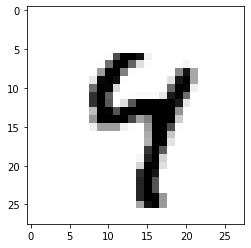

In [20]:
# MNIST(Modified National Institute of Standard Technology database)
# 손글씨체 이미지 : 28*28 = 784, [0,1,2,3,4,5,6,7,8,9]
# train data : 55000개  , train-images-idx3-ubyte.gz
# test data : 10000 개  , t10k-images-idx3-ubyte.gz
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets('mnist_data/',one_hot=True)
mnist.train.images.shape  # (55000, 784)
mnist.train.labels.shape  # (55000, 10)

mnist.test.images.shape  # (10000, 784)
mnist.test.labels.shape  # (10000, 10)

num =2
plt.imshow(mnist.train.images[num:num+1].reshape(28,28),
          cmap='Greys',interpolation='nearest')
print(mnist.train.labels[num:num+1])

plt.show()

Start Learning!
Epoch: 1 cost: 7.800682549029583
Epoch: 2 cost: 2.8296757283806837
Epoch: 3 cost: 2.319379150941969
Epoch: 4 cost: 2.0763349970430136
Epoch: 5 cost: 1.9296622795984157
Epoch: 6 cost: 1.826096535027029
Epoch: 7 cost: 1.7522523702681059
Epoch: 8 cost: 1.700023875162006
Epoch: 9 cost: 1.666601181030272
Epoch: 10 cost: 1.6101679028198115
Epoch: 11 cost: 1.5929668218642488
Epoch: 12 cost: 1.578081312328577
Epoch: 13 cost: 1.5660518243908885
Epoch: 14 cost: 1.5513582351803776
Epoch: 15 cost: 1.5239449158310912
Learning Finished!

Accuracy: [0.9211]
random= 8896 Label: [6]


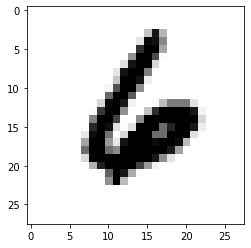

In [21]:
tf.set_random_seed(777)
learning_rate = 0.01
training_epochs = 15
batch_size = 100

X = tf.placeholder(tf.float32,shape=[None,784])
Y = tf.placeholder(tf.float32,shape=[None,10])

W = tf.Variable(tf.random_normal([784,10]),name='weight')
b= tf.Variable(tf.random_normal([10]),name='bias')

#       (?,784) * (784,10) = (?,10)
logits = tf.matmul(X,W) + b
hypothesis = tf.nn.softmax(logits)           

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
                logits=logits, labels = Y))
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=
#                         learning_rate).minimize(cost)
# Accuracy: [0.7927]

optimizer = tf.train.AdamOptimizer(learning_rate=
                        learning_rate).minimize(cost)
# Accuracy: [0.9163]


sess = tf.Session()
sess.run(tf.global_variables_initializer())

print("Start Learning!")
# start training
for epoch in range(training_epochs):  # 15회
    avg_cost = 0
    total_batch = int(mnist.train.num_examples/batch_size)

    for i in range(total_batch):  # 550회
        batch_xs,batch_ys = mnist.train.next_batch(batch_size)
        c,_ = sess.run([cost,optimizer],\
                       feed_dict={X:batch_xs,Y:batch_ys})
        avg_cost += c/batch_size
    
    print('Epoch:',epoch + 1,'cost:',avg_cost )
print("Learning Finished!")    

# Accuracy Cmputation
predict = tf.argmax(hypothesis,1)
correct_predict = tf.equal(predict,tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_predict,
                                 dtype=tf.float32))

a = sess.run([accuracy],feed_dict={X:mnist.test.images,
                                  Y:mnist.test.labels})
print('\nAccuracy:',a) # Accuracy: [0.7939]

# Predict
import random
r = random.randint(0,mnist.test.num_examples - 1) # 0~ 9999
p = sess.run(predict,feed_dict={X:mnist.test.images[r:r+1]})
print("random=",r, "Label:",
      sess.run(tf.argmax(mnist.test.labels[r:r+1],1 )))
# matplotlib : imshow()
plt.imshow(mnist.test.images[r:r+1].reshape(28,28),
           cmap='Greys', interpolation='nearest')  # 2차원 보간법

plt.show()

mini batch : 대용량 데이터에서 표본추출 방법


### 정확도 향상 방안
1. AdamOptimizer사용
2. ReLU 사용
3. xavier_initializer사용: weight의 초기값을 할당
4. DNN 사용 : 3층 --> 5층
5. dropout 사용

약 97%으로 향상

6. CNN(합성곱 신경망)
7. ensemble 사용

약 99.5%으로 향상

In [22]:
# tf.IntereractiveSession()
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

sess = tf.InteractiveSession()

a = tf.constant(10)
b = tf.constant(20)
add_node = tf.add(a,b)

print(add_node.eval())
print(sess.run(add_node))


30
30


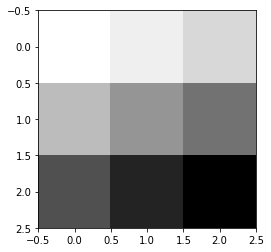

In [23]:
# CNN(Convolutional Neural Network)
# conv2d 출력 이미지 = (N - F)/stride + 1

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# (1,3,3,1) , 3*3 Greyscale toy image,원본 입력이미지
# 1 : 이미지의 갯수
# 3 : 가로 픽셀수
# 3 : 세로 픽셀수
# 1 : color수,Grey 
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]],
                   [[7],[8],[9]]]],dtype=np.float32)
# print(image)
image.shape #(1, 3, 3, 1)
plt.imshow(image.reshape(3,3),cmap='Greys')
plt.show()

In [24]:
# sess = tf.InteractiveSession()
# a = tf.constant(10)
# b = tf.constant(20)
# add_node = tf.add(a,b)
# print(add_node.eval())

[[[[12.]
   [16.]]

  [[24.]
   [28.]]]]
[[12. 16.]
 [24. 28.]]


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\client\session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


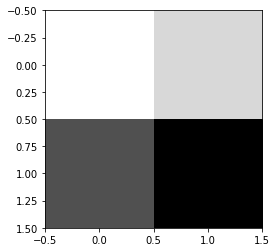

In [25]:
# conv2d, Padding
# image :(1, 3, 3, 1), filter: (2,2,1,1), stride:(1,1)
# filter: (2,2,1,1)
# 2 : 가로 갯수
# 2 : 세로 갯수
# 1 : color
# 1 : filter의 갯수

# (N - F)/stride + 1 공식을 사용
# (3 - 2)/1 + 1 = 2  ,zero padding을 안했을 때
# (4 - 2)/1 + 1 = 3  ,zero padding을 했을 때

# padding을 안했을 때 : 'VALID'
# 출력이미지 : (1,2,2,1)
sess = tf.InteractiveSession()
# filter: (2,2,1,1)
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
conv2d = tf.nn.conv2d(image,weight,strides=[1,1,1,1],
                     padding='VALID')
conv2d_img = conv2d.eval()  # (1,2,2,1)
print(conv2d_img)
# print('conv2d_img shape:',conv2d_img.shape)

# 시각화
for i,one_image in enumerate(conv2d_img):
    print(one_image.reshape(2,2))  
    plt.imshow(one_image.reshape(2,2),cmap='Greys')
plt.show()

[[[[12.]
   [16.]
   [ 9.]]

  [[24.]
   [28.]
   [15.]]

  [[15.]
   [17.]
   [ 9.]]]]
conv2d_img shape: (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


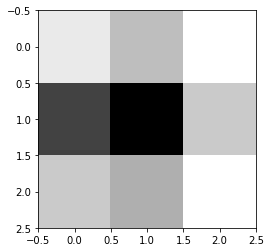

In [26]:
# padding을 했을 때 : 'SAME'
# image :(1, 3, 3, 1), filter: (2,2,1,1), stride:(1,1)
# 출력이미지 : (1,3,3,1)
# sess = tf.InteractiveSession()
# filter: (2,2,1,1)
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
conv2d = tf.nn.conv2d(image,weight,strides=[1,1,1,1],
                     padding='SAME')
conv2d_img = conv2d.eval()  # (1,3,3,1)

# (1,3,3,1)
# 1 : color
# (N - F)/stride + 1
# ( 3+1 - 2)/1 + 1 --> 3
# ( 3+1 - 2)/1 + 1 --> 3
# 1: 이미지의 갯수(사용된 필터의 갯수)
print(conv2d_img)
print('conv2d_img shape:',conv2d_img.shape)

# 시각화
for i,one_image in enumerate(conv2d_img):
    print(one_image.reshape(3,3))  
    plt.imshow(one_image.reshape(3,3),cmap='Greys')
plt.show()

conv2d_img.shape: (1, 3, 3, 3)
conv2d_img.shape: (3, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


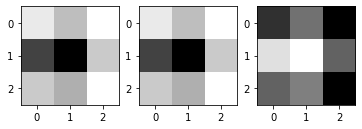

In [27]:
# conv2d : 3 filters, Padding : SAME (zero padding 함)
# image : (1,3,3,1) , Filter: (2,2,1,3), stride : (1,1)
# 출력 이미지 : (1,3,3,3)
# 1 : color
# (N - F)/stride + 1
# ( 3+1 - 2)/1 + 1 --> 3
# ( 3+1 - 2)/1 + 1 --> 3
# 3: 이미지의 갯수(사용된 필터의 갯수)
# filter : (2,2,1,3)
weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
conv2d = tf.nn.conv2d(image,weight,strides=[1,1,1,1],
                     padding='SAME')
conv2d_img = conv2d.eval()  # (1,3,3,3)
print('conv2d_img.shape:',conv2d_img.shape) # (1,3,3,3)
conv2d_img = np.swapaxes(conv2d_img,0,3)    # (3, 3, 3, 1)
print('conv2d_img.shape:',conv2d_img.shape)  

# 시각화
for i,one_image in enumerate(conv2d_img):
    print(one_image.reshape(3,3))  
    plt.subplot(1,3,i + 1)
    plt.imshow(one_image.reshape(3,3),cmap='Greys')
plt.show()

(1, 2, 2, 1)


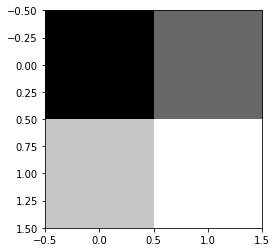

In [28]:
# max pooling  : (1,2,2,1)  --> (1,2,2,1) , Padding:'SAME'
image = np.array([[[[4],[3]],
                   [[2],[1]]]],dtype=np.float32)
print(image.shape)
# image
plt.imshow(image.reshape(2,2),cmap='Greys')
plt.show()

In [29]:
# image : (1,2,2,1)
pool = tf.nn.max_pool(image,ksize=[1,2,2,1],strides=[1,1,1,1],
                     padding='VALID')
print(pool.shape)
print(pool.eval())

(1, 1, 1, 1)
[[[[4.]]]]


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting Data/mnist\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting Data/mnist\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting Data/mnist\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting Data/mnist\t10k-labels-idx1-ubyte.gz
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


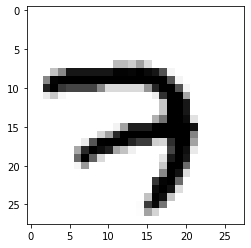

In [30]:
# MNIST image data loading
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('Data/mnist',one_hot=True)

image = mnist.train.images[0].reshape(28,28)
print(mnist.train.labels[0]) # 7
# print(image)
plt.imshow(image,cmap='Greys')
plt.show()

(1, 14, 14, 5)
(5, 14, 14, 1)


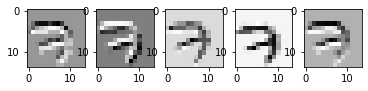

In [31]:
# MNIST Convolution layer
# image : (1,28,28,1)
img = image.reshape(-1,28,28,1)
img.shape

W = tf.Variable(tf.random_normal([3,3,1,5]),name='weight')

conv2d = tf.nn.conv2d(img,W,strides=[1,2,2,1],
                     padding="SAME")
# (28 - 3)/2 + 1  --> 14
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
print(conv2d_img.shape) # shape=(1, 14, 14, 5)
conv2d_img = np.swapaxes(conv2d_img,0,3)
print(conv2d_img.shape) # shape=(5, 14, 14, 1)

# 시각화
for i,one_image in enumerate(conv2d_img):
#     print(one_image.reshape(14,14))  
    plt.subplot(1,5,i + 1)
    plt.imshow(one_image.reshape(14,14),cmap='Greys')
plt.show()

(1, 7, 7, 5)
(5, 7, 7, 1)


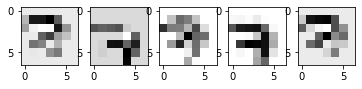

In [32]:
# MNIST Max Pooling
# conv2d : (1, 14, 14, 5), kernel size:(2,2),strides:(2,2),
# padding:'SAME'
# Output image : (1,7,7,5)
# (N-F)/stride + 1
# (15-2)/2 + 1 => 7
pool = tf.nn.max_pool(conv2d,ksize=[1,2,2,1],strides=[1,2,2,1],\
                      padding='SAME')
pool_img = pool.eval()
print(pool_img.shape) # (1, 7, 7, 5)
pool_img = np.swapaxes(pool_img,0,3)
print(pool_img.shape) # (5, 7, 7, 1)

# 시각화
for i,one_image in enumerate(pool_img):
    plt.subplot(1,5,i + 1)
    plt.imshow(one_image.reshape(7,7),cmap='Greys')
plt.show()